# **Business Understanding**
Company R adalah Agen penempatan kerja yang menyediakan program pelatihan data science gratis ke berbagai industri company client di seluruh Indonesia. Adapun persyaratan yang diberlakukan adalah sebagai berikut :
- Terbatas untuk 100 pelamar.
- Diselenggarakan secara triwulanan (dimulai pada minggu pertama bulan Januari, April, Juli, Okt).
- Durasi pelatihan 3 bulan. <br>
- Agensi menawarkan kontrak penempatan kerja selama satu tahun.
- Company R mendapatkan keuntungan sebesar 0,25% dari gaji bulanan.
- Pekerjaan akan berakhir setelah periode satu tahun selesai, kecuali jika ditawarkan kontrak/perpanjangan baru.
## **`Problem`**
Bagaimana cara meningkatkan keuntungan yang diperoleh dari penempatan kerja tidak maksimal.
## **`Goals`**
Membantu Company R dalam meningkatkan keuntungan yang diperoleh dari program penempatan kerja dan memastikan biaya yang digunakan dapat memberi keuntungan yang lebih besar.
## **`Objective`**
Membangun model Machine Learning yang dapat membantu mengidentifikasi apakah kandidat yang mendaftar pelatihan  sedang mencari perubahan pekerjaan atau tidak berdasarkan dari data baru yang diberikan. <br>
Kemampuan untuk menyaring kandidat yang mendaftar pelatihan untuk mencari perubahan pekerjaan dengan cara yang lebih tepat. <br>
Porsi yang lebih besar dari peserta pelatihan yang mencari perubahan pekerjaan = Lebih banyak kandidat untuk program penempatan kerja.
## **`Business Metrics`**
Revenue (pendapatan) dari program penempatan kerja.



In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/FitAndraini/portfolio_data_science_and_data_analyst/master/Dataset/hr_analytics.csv")
df.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

# Explore data

Kita memiliki 19158 data yang akan digunakan yang masing - masing memiliki 14 kolom. Kolom - kolom tersebut memiliki arti :
1. **enrollee_id** : ID unik kandidat
2. **city**: kota
3. **city_development _index**: Indeks perkembangan kota (berskala)
4. **gender**: Jenis kelamin kandidat
5. **relevent_experience** : Pengalaman kandidat yang relevan
6. **enrolled_university** : Jenis program Universitas yang didaftarkan jika ada
7. **education_level**: Tingkat pendidikan kandidat
8. **major_discipline** : Disiplin ilmu kandidat / jurusan
9. **experience** : Pengalaman kandidat dalam beberapa tahun
10. **company_size**: Jumlah karyawan pada perusahaan pemberi kerja
11. **company_type** : Jenis perusahaan pemberi kerja
12. **last_new_job**: Selisih tahun antara pekerjaan sebelumnya dan pekerjaan saat ini
13. **training_hours**: lama waktu pelatihan selesai
14. **target**: 0 – Tidak mencari perubahan pekerjaan (not looking for job), 1 – Mencari perubahan pekerjaan (looking for job)


# **STAGE 1: Exploratory Data Analysis**

# **Descriptive Statistics**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [5]:
# Melihat jumlah data
for col in df:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom enrollee_id:
8949     1
10660    1
30726    1
18507    1
31273    1
        ..
11547    1
32067    1
14356    1
18051    1
23834    1
Name: enrollee_id, Length: 19158, dtype: int64

Value count kolom city:
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

Value count kolom city_development_index:
0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64

Value count kolom gender:
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

Value count kolom relevent_experience:
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

Value count kolom enrolled_university:
no_enrollme

Kita dapat melihat bahwa:
- Dataframe memiliki total 19158 baris dan 14 kolom
- Dataframe masih memiliki beberapa null values di beberapa kolom seperti : `gender`, `enrolled_university`, `education_level `, `major_discipline`, `experience`, `company_size`, `company_type`, `last_new_job`
- Target klasifikasinya akan ada di kolom `target` dengan tipe data float64.
- sisanya adalah feature yang sifatnya adalah numerik dan object dalam bentuk tipe data int64, float64
- Kolom `enrollee_id` seharusnya ber tipe data object.
- Kolom `target` seharusnya ber tipe data int64.
- Untuk mengetahui kualifikasi dari tiap kandidat berdasarkan berapa tahun pengalaman di dunia kerja, perlu dibuat kolom baru `experience_level` berdasarkan beberapa level pengalaman, yang mana diambil dari kolom `experience`.
- Perlu dibuat kolom baru `graduate` berdasarkan kolom `education_level` untuk memisahkan tingkat pendidikan kandidat, yaitu : **yes** = ['Graduate', 'Masters', 'Phd'] <br>**no** = ['Primary School', 'High School'].
- Pada kolom `last_new_job` perlu dilakukan perubahan data, karena dapat dilihat data kurang sesuai, sehingga sulit untuk dibaca.
- Pada kolom `company_size` terdapat data kurang sesuai yaitu **10/49** dan **<10** sehingga perlu dilakukan perubahan data.
- Data target tidak balance sekitar **20-40%** sehingga perlu dilakukan handle imbalance dengan oversampling dan undersampling, kecuali jika datanya diatas **40%** sehingga tidak perlu dilakukan handle imbalance.

### Sampling untuk memahami data, menghindari invalid values

In [6]:
df.sample(10)

enrollee_id      city  city_development_index gender  \
15166         2227   city_28                   0.939   Male   
12850         8348   city_97                   0.925   Male   
11677        32687   city_42                   0.563    NaN   
3031          4412   city_21                   0.624   Male   
7847         18397   city_90                   0.698    NaN   
7775          5419  city_103                   0.920   Male   
9051         18192  city_102                   0.804    NaN   
11913        29162   city_73                   0.754   Male   
2769         30395  city_114                   0.926   Male   
3242         32220   city_83                   0.923   Male   

           relevent_experience enrolled_university education_level  \
15166  Has relevent experience       no_enrollment         Masters   
12850  Has relevent experience       no_enrollment         Masters   
11677  Has relevent experience    Full time course             Phd   
3031   Has relevent experience       no_enrollment        Graduate   
7847    No relevent experience                 NaN        Graduate   
7775    No relevent experience       no_enrollment         Masters   
9051   Has relevent experience       no_enrollment        Graduate   
11913  Has relevent experience    Full time course        Graduate   
2769   Has relevent experience       no_enrollment     High School   
3242   Has relevent experience       no_enrollment         Masters   

      major_discipline experience company_size         company_type  \
15166             STEM         10      100-500              Pvt Ltd   
12850             STEM          9      500-999              Pvt Ltd   
11677             STEM         <1          NaN                  NaN   
3031              STEM        >20       10000+              Pvt Ltd   
7847              STEM         <1          <10                  NaN   
7775              Arts          4          NaN                  NaN   
9051              STEM          7          <10  Early Stage Startup   
11913             STEM         12          NaN                  NaN   
2769               NaN         15        50-99              Pvt Ltd   
3242             Other         18       10000+                  NaN   

      last_new_job  training_hours  target  
15166            1              35     0.0  
12850           >4             272     0.0  
11677          NaN              43     1.0  
3031         never              74     0.0  
7847           NaN              55     1.0  
7775             1               6     1.0  
9051             1              35     0.0  
11913            1              91     1.0  
2769            >4              64     0.0  
3242             1              44     0.0

# **Statistical Summary**

In [7]:
nums = ['city_development_index', 'training_hours'] #target excluded for visulization
cats = ['city','gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

In [8]:
df[nums].describe().T

count       mean        std    min    25%     50%  \
city_development_index  19158.0   0.828848   0.123362  0.448   0.74   0.903   
training_hours          19158.0  65.366896  60.058462  1.000  23.00  47.000   

                          75%      max  
city_development_index   0.92    0.949  
training_hours          88.00  336.000

### Pendekatan Numeric
- Nilai yang tertera pada setiap kolom masuk akal.
- Nilai max/min untuk kolom city_development_index sudah dibatas wajar yakni dari 0.448 - 0.949. Hanya saja, nilai max/min untuk kolom training_hours memiliki selisih yang cukup jauh yakni 1 - 336 hours.
- Selisih mean dan median: `city_development_index` = 0.07 (signifikan),`training_hours` = 65.36 - 47.00 = 18.36 terindikasi **positively skewed** karena mean > median.

In [9]:
df[cats].describe().T

count unique                      top   freq
city                 19158    123                 city_103   4355
gender               14650      3                     Male  13221
relevent_experience  19158      2  Has relevent experience  13792
enrolled_university  18772      3            no_enrollment  13817
education_level      18698      5                 Graduate  11598
major_discipline     16345      6                     STEM  14492
experience           19093     22                      >20   3286
company_size         13220      8                    50-99   3083
company_type         13018      6                  Pvt Ltd   9817
last_new_job         18735      6                        1   8040


### Pendekatan Categorikal
  - Jumlah unique values sudah masuk akal untuk setiap kolom.
  - Hanya saja, unique values kolom `experience` ada 22. Jika data memiliki lebih dari 10 kategori, ini bisa menjadi masalah dalam proses analisis data, terutama jika kategori tersebut tidak terdistribusi secara merata. Mungkin akan lebih baik dibuat menjadi range 0, 1-5, 6-15, 16-20, 21.

# **Univariate Analysis**

Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada kolom Numeric dengan *Univariate Analysis* untuk melihat distribusinya.

### Boxplot

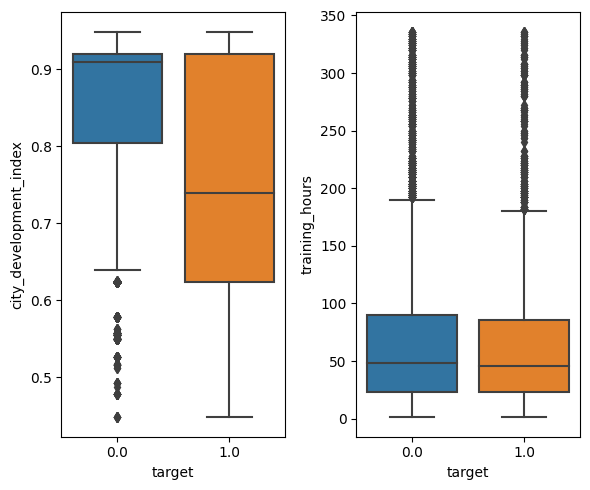

In [10]:
plt.figure(figsize=(6,5))
for i in range(0, len(nums)):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=df[nums[i]], orient='v', x = df['target'])
    plt.tight_layout()

### Violin Plots

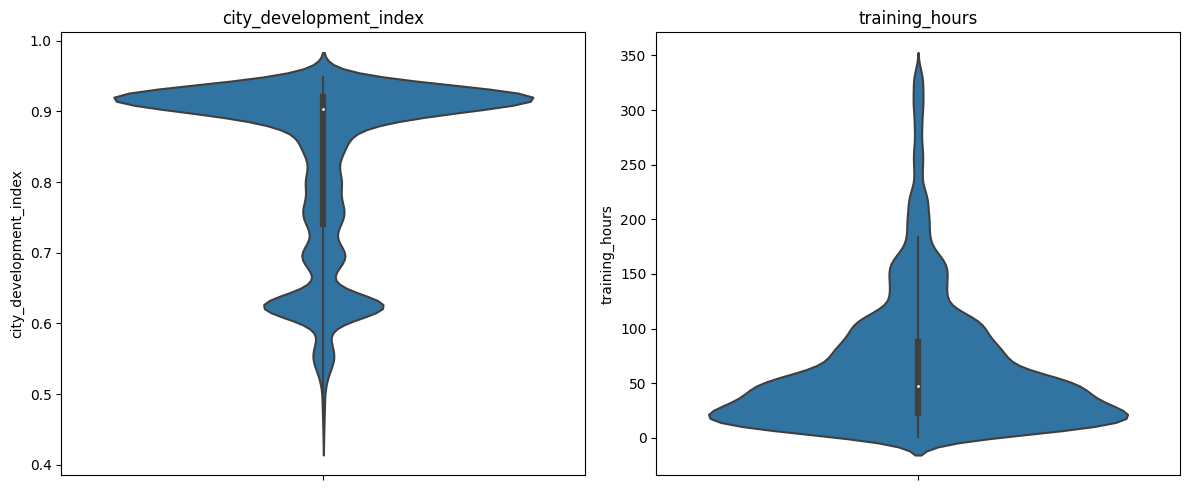

In [11]:
fig, axs = plt.subplots(1, len(nums), figsize=(12, 5), squeeze=False)
for i, nums in enumerate(nums):
    sns.violinplot(y=df[nums], ax=axs[0][i], hue=df['target'])
    axs[0][i].set_title(nums)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi diatas :
- Outlier terdapat pada kolom `city_development_index` target 0 dan `training_hours`. Semua data yang  memiliki outlier adalah positively skewed.
- `city_development_index`:
  - Distribusi data city_development_index pada target 0 lebih kecil dibandingkan dengan target 1.
  - Median `city_development_index` berada diatas 0.9, yang artinya kebanyakan kandidat yang tidak sedang mencari perubahan pekerjaan (target 0) berasal dari kota yang memiliki nilai `city_development_index` yang tinggi (kot-kota maju). Sedangkan, kandidat yang sedang mencari perubahan pekerjaan (target 1) berasal dari kota dengan nilai `city_development_index` yang lebih rendah (median = 0.73).
  - Outliers hanya terdapat pada data kandidat yang tidak sedang mencari perubahan  (target 0), dimana outliers berada dibawah nilai 0.64. Artinya, meskipun banyak dari mereka yang berasal dari kota besar, terdapat beberapa kandidat dari kota kecil yang juga tidak ingin mencari perubahan pekerjaan.

- `training_hours`:
  - Distribusi data pada kolom `training_hours` antara kandidat yang sedang mencari perubahan pekerjaan (target 1) dan yang tidak hampir sama. Kebanyakan kandidat menyelesaikan training dalam waktu kurang lebih 50 jam.
  - Pada umumnya, kandidat dapat menyelesaikan training dalam waktu 1 sampai 180 jam. Tapi ada beberapa persen orang yang tidak cukup mampu menyelesaikan training dalam jangka waktu tersebut (outlier), baik dalam kategori kandidat yang sedang mencari perubahan pekerjaan (target 1) atau yang tidak.
  - **Rekomendasi untuk tim bisnis**: Lebih fokus pada kandidat dengan training hours diatas 180, karena semakin lama waktu training yang dibutuhkan, akan memerlukan cost yang lebih besar.


### Histplot

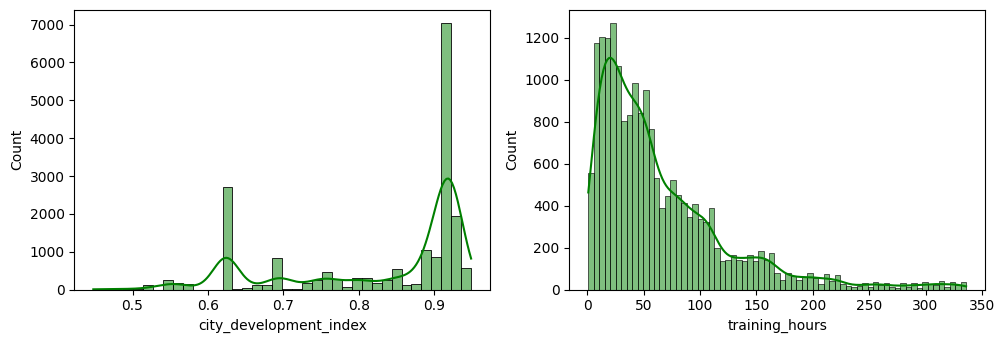

In [12]:
nums = ['city_development_index', 'training_hours']

plt.figure(figsize=(15, 20))
for i in range(0, len(nums)):
    plt.subplot(6, 3, i+1)
    sns.histplot(df[nums[i]], color='green', kde=True)
    plt.tight_layout()

Berdasarkan visualisasi Hist Plots diatas : <br>
- `city_development_index` berbentuk **Bimodal**. <br>
  - Lonjakan terbesar berada di sekitar nilai indeks 0.9. Ini artinya kebanyakan kandidat yang mengikuti training adalah kandidat yang berasal dari kota-kota besar. <br>
  - Namun, juga terdapat lonjakan di sekitar nilai indeks 0.62, yang menunjukkan bahwa jumlah kandidat dari kota yang tidak tergolong kota besar juga cukup banyak, walau tidak sebanyak kandidat yang berasal dari kota besar.
- `training_hours` berbentuk **positively skewed**
 - Kebanyakan kandidat dapat menyelesaikan training dalam waktu 1-180 jam.
  - Tapi, terdapat data outliers, dimana data-data tersebut bernilai jauh lebih tinggi daripada data-data lainnya (dapat dilihat dari adanya pencilan pada kanan grafik).

### Countplot (categorical)

In [13]:
def percentages(col):
  x = df.groupby([col, 'target'])[['city']].count().reset_index()
  x.columns = [col, 'target', 'count']
  x['total'] = x.groupby([col])[['count']].transform('sum')
  x['percentage'] = x['count'] / x['total'] * 100
  x.sort_values(['percentage'], ascending = False, inplace = True)
  x = x[x.target == 1]
  display(x)

In [14]:
for i in [i for i in cats if i not in (['city'])]:
  percentages(i)

gender  target  count  total  percentage
1  Female     1.0    326   1238   26.332795
5   Other     1.0     50    191   26.178010
3    Male     1.0   3012  13221   22.781938

relevent_experience  target  count  total  percentage
3   No relevent experience     1.0   1816   5366   33.842713
1  Has relevent experience     1.0   2961  13792   21.468968

enrolled_university  target  count  total  percentage
1    Full time course     1.0   1431   3757   38.088901
3    Part time course     1.0    302   1198   25.208681
5       no_enrollment     1.0   2921  13817   21.140624

education_level  target  count  total  percentage
1        Graduate     1.0   3245  11598   27.978962
5         Masters     1.0    935   4361   21.440037
3     High School     1.0    394   2017   19.533961
7             Phd     1.0     58    414   14.009662
9  Primary School     1.0     41    308   13.311688

major_discipline  target  count  total  percentage
9             Other     1.0    102    381   26.771654
3   Business Degree     1.0     86    327   26.299694
11             STEM     1.0   3791  14492   26.159260
7          No Major     1.0     55    223   24.663677
5        Humanities     1.0    141    669   21.076233
1              Arts     1.0     53    253   20.948617

experience  target  count  total  percentage
41         <1     1.0    237    522   45.402299
1           1     1.0    233    549   42.440801
27          3     1.0    478   1354   35.302806
23          2     1.0    374   1127   33.185448
29          4     1.0    457   1403   32.573058
35          7     1.0    303   1028   29.474708
31          5     1.0    412   1430   28.811189
33          6     1.0    343   1216   28.207237
37          8     1.0    195    802   24.314214
5          11     1.0    151    664   22.740964
25         20     1.0     33    148   22.297297
39          9     1.0    213    980   21.734694
3          10     1.0    207    985   21.015228
9          13     1.0     77    399   19.298246
7          12     1.0     92    494   18.623482
11         14     1.0    107    586   18.259386
21         19     1.0     53    304   17.434211
17         17     1.0     57    342   16.666667
13         15     1.0    114    686   16.618076
19         18     1.0     43    280   15.357143
43        >20     1.0    503   3286   15.307365
15         16     1.0     72    508   14.173228

company_size  target  count  total  percentage
1         10/49     1.0    344   1471   23.385452
7        10000+     1.0    385   2019   19.068846
13    5000-9999     1.0    102    563   18.117229
9         50-99     1.0    545   3083   17.677587
11      500-999     1.0    152    877   17.331813
15          <10     1.0    224   1308   17.125382
3       100-500     1.0    415   2571   16.141579
5     1000-4999     1.0    200   1328   15.060241

company_type  target  count  total  percentage
7                 Other     1.0     29    121   23.966942
1   Early Stage Startup     1.0    142    603   23.548922
9         Public Sector     1.0    210    955   21.989529
5                   NGO     1.0     97    521   18.618042
11              Pvt Ltd     1.0   1775   9817   18.080880
3        Funded Startup     1.0    140   1001   13.986014

last_new_job  target  count  total  percentage
11        never     1.0    739   2452   30.138662
1             1     1.0   2125   8040   26.430348
3             2     1.0    700   2900   24.137931
5             3     1.0    231   1024   22.558594
7             4     1.0    228   1029   22.157434
9            >4     1.0    600   3290   18.237082

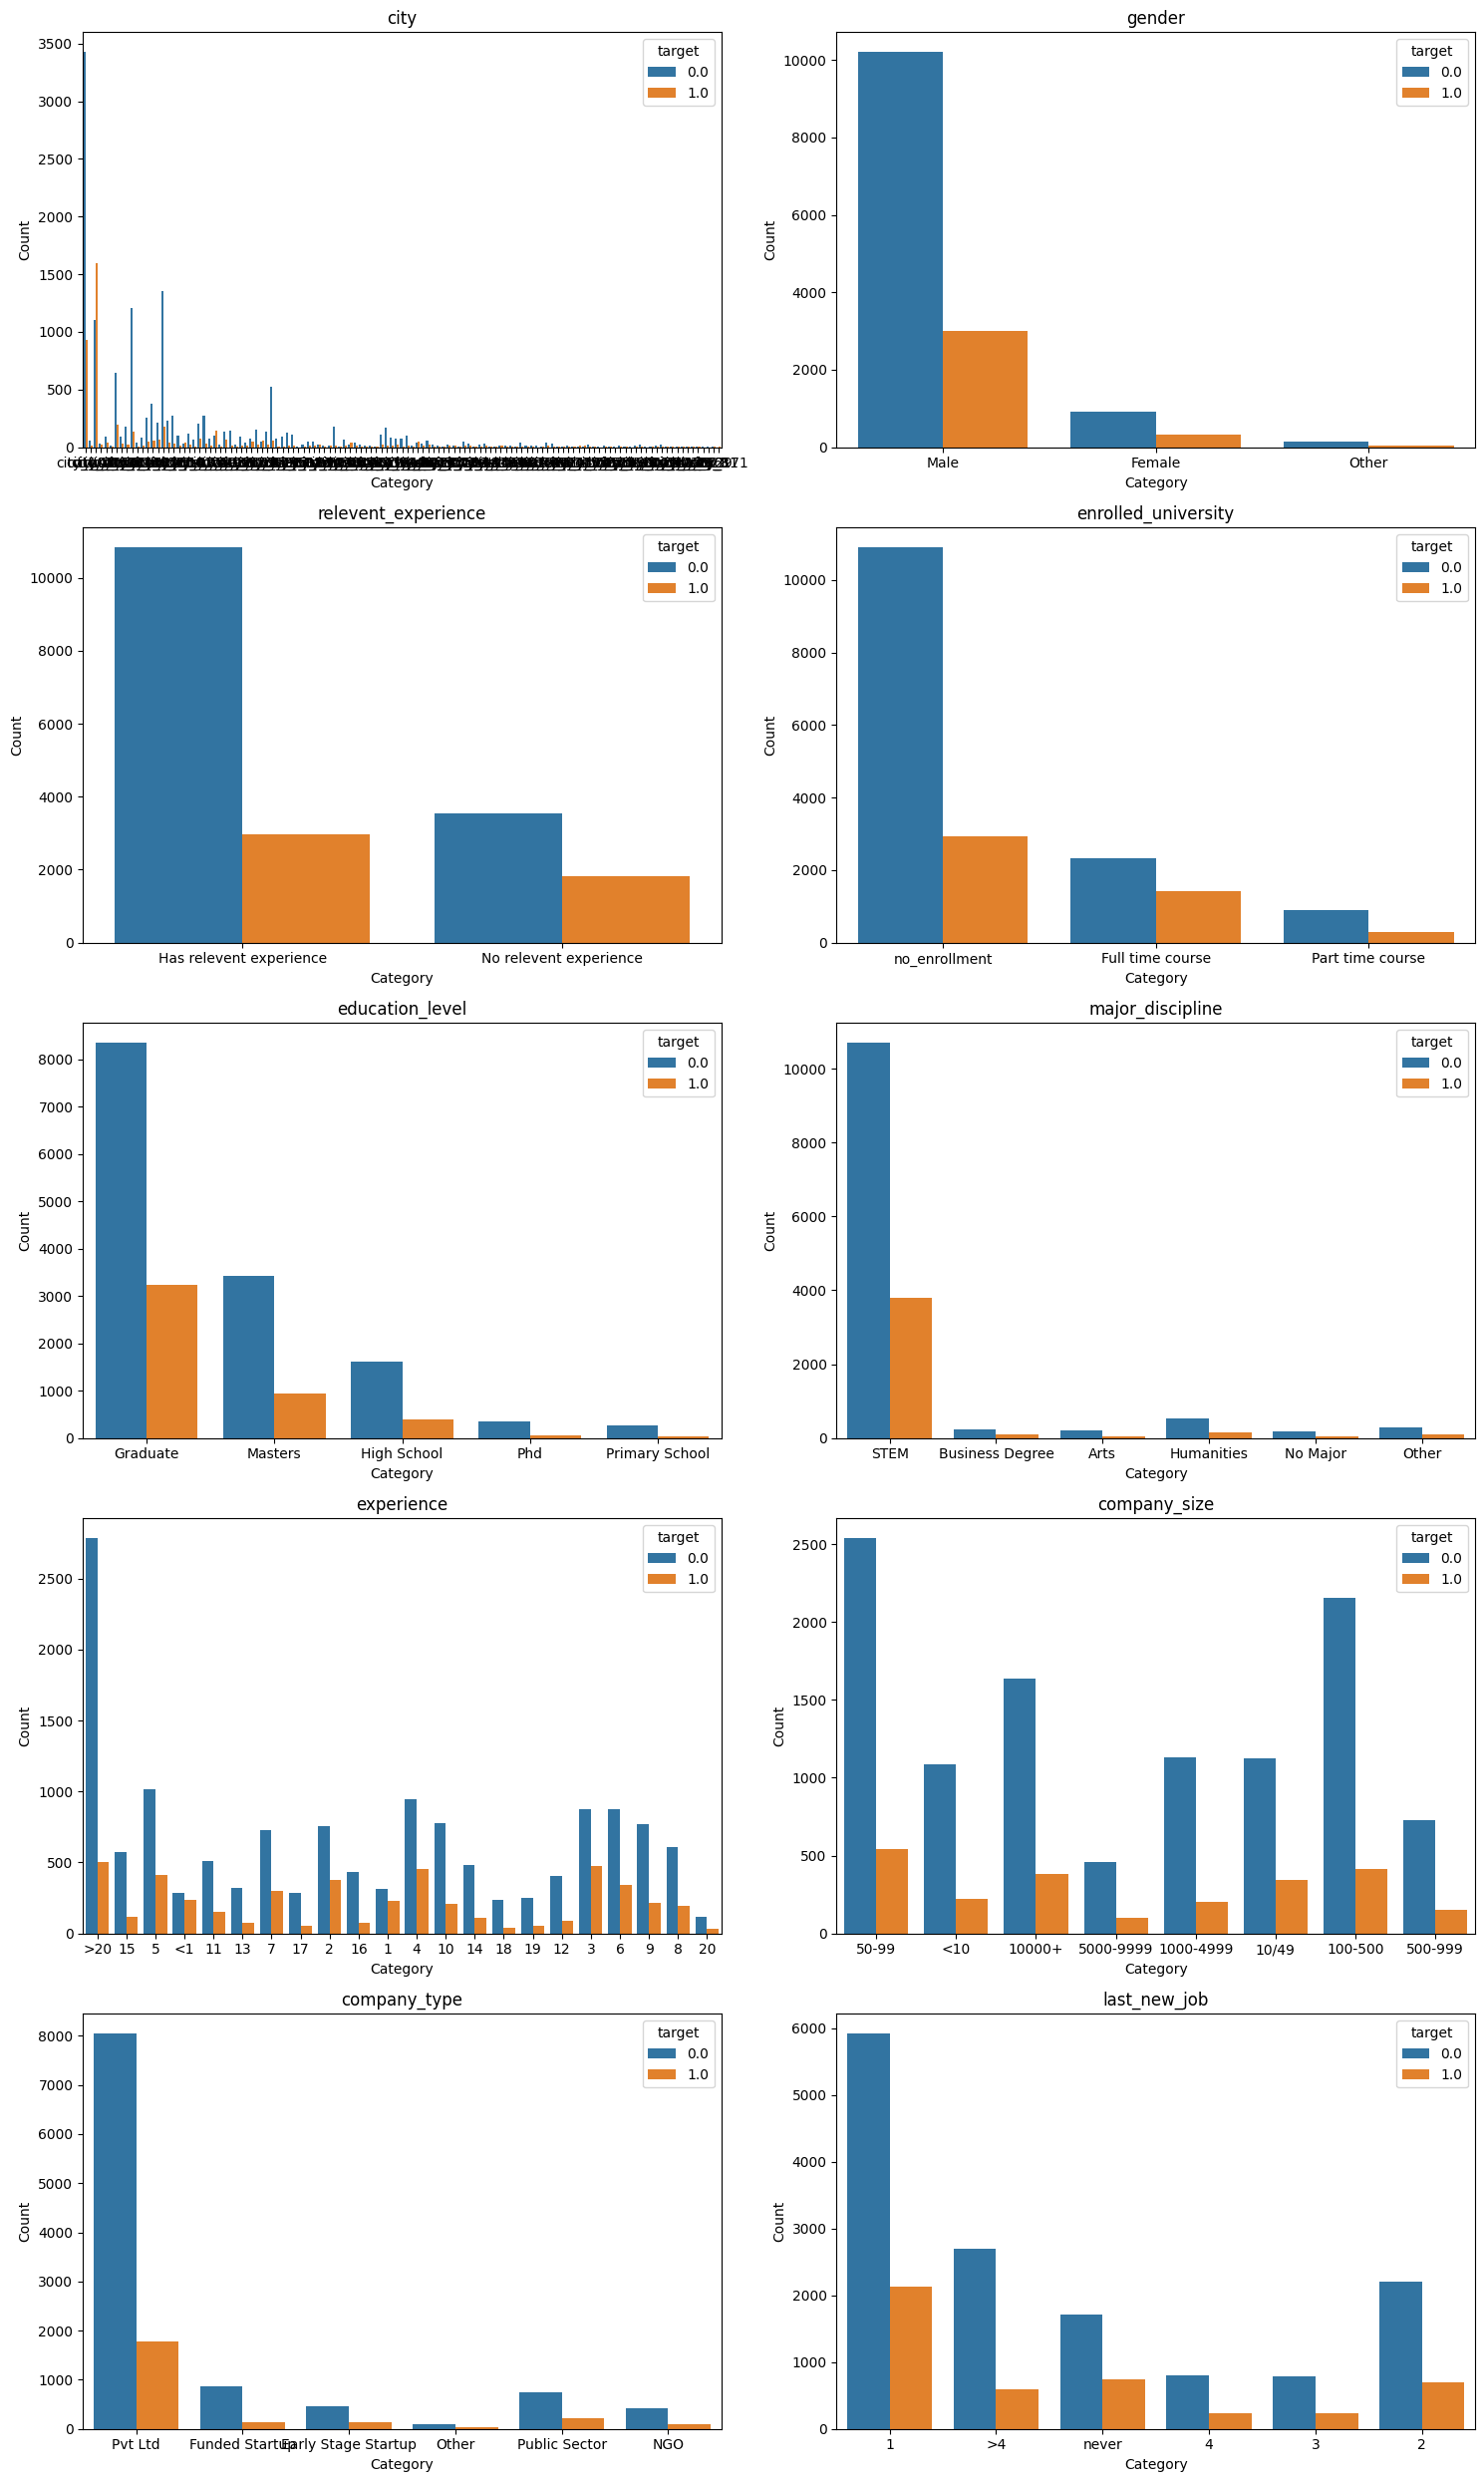

In [15]:
feat_cat = cats
n = len(feat_cat)

rows = (n + 1) // 2
cols = 2

fig, ax = plt.subplots(rows, cols, figsize=(15, 5 * rows))

for i in range(n):
    row = i // 2
    col = i % 2
    sns.countplot(x=df[feat_cat[i]], hue = df['target'], ax=ax[row, col])
    ax[row, col].set_title(feat_cat[i])
    ax[row, col].set_xlabel("Category")
    ax[row, col].set_ylabel("Count")

plt.tight_layout()
plt.show()

Berdasarkan visualisasi Countplot diatas : <br>
1. `city`
  - Berdasarkan histogram kebanyakan kandidat berasal dari city_103 yaitu sebanyak 4355 orang.
  - Kandidat memiliki asal city yang berbeda-beda dan bervariasi sehingga kolom city memiliki keragaman cukup tinggi, baik pada kandidat yang memilih mencari perubahan pekerjaan serta pada kandidat yang tidak mencari perubahan pekerjaan.
2. `gender`
  - Kandidat yang tidak ingin mencari perubahan pekerjaan untuk jenis kelamin laki-laki memiliki proporsi yang paling tinggi diantara kandidat lainnya
  - Jumlah kandidat laki-laki yang ingin mencari perubahan pekerjaan sebanyak 3012, dengan persentase sebanyak 22.7%
  - Jumlah kandidat perempuan yang ingin mencari perubahan pekerjaan sebanyak 326, dengan persentase sebanyak 26.3%
3. `relevant_experience` <br>
Kandidat yang tidak ingin mencari perubahan pekerjaan dengan pengalaman yang relevan dengan Data Science memiliki proporsi lebih tinggi dibanding dengan yang ingin mencari perubahan pekerjaan, namun jika dilihat dari persentase kandidat yang ingin mencari perubahan pekerjaan, kandidat yang switch career (tidak memiliki pengalaman yg relevan dengan Data Science) memiliki persentase yang lebih tinggi daripada kandidat dengan pengalaman relevan. Berikut rinciannya :
  - Jumlah kandidat yang ingin mencari perubahan pekerjaan dengan pengalaman yg relevan dengan Data Science adalah sebesar 2.961, dengan persentase sebanyak 21.4%
  - Jumlah kandidat yang ingin mencari perubahan pekerjaan namun tidak memiliki pengalaman yang relevan dengan Data Science (switch career) adalah sebesar 3.550, dengan persentase sebanyak 66.1%
4. `enrolled_university` <br>
Kandidat yang ingin mencari perubahan pekerjaan yang bukan lulusan Universitas memiliki proporsi lebih rendah dibanding dengan yang tidak, namun jika dilihat dari persentase kandidat yang ingin mencari perubahan pekerjaan, kandidat yang full time course (fokus kuliah saja) memiliki persentase yang lebih tinggi daripada kandidat lainnya (tidak kuliah, kuliah-kerja), dengan rincian sebagai berikut :
  - Jumlah kandidat yang ingin mencari perubahan pekerjaan yang tidak berkuliah (bukan lulusan Universitas) relevan adalah sebesar 2.921, dengan persentase sebanyak 21.1%
  - Jumlah kandidat yang ingin mencari perubahan pekerjaan yang full time course (fokus kuliah saja) adalah sebesar 1.431, dengan persentase sebanyak 61.5%
5. `education_level`
  - Kandidat yang mengikuti training kebanyakan adalah para graduate.
  - Tapi, jika dilihat dari proporsinya, perbedaan unique value dalam kolom `education_level` tidak memiliki pengaruh yang signifikan. Ini dikarenakan proporsi antara kandidat yang tidak sedang mencari perubahan pekerjaan (target 0) dan yang **sedang** mencari perubahan pekerjaan (target 1) sangat mirip (target 1 memiliki proporsi sekitar 25% dari total data pada setiap unique value).
6. `major_discipline`
  - Mayoritas kandidat memiliki bidang disiplin STEM (Sains, Teknologi, Kejuruteraan, dan Matematik).
  - Mirip dengan kolom `education_level`, perbedaan unique value dalam kolom `major_discipline` tidak memiliki pengaruh yang signifikan dikarenakan proporsi antara target 0 dan target 1 yang tidak jauh berbeda (target 1 memiliki proporsi dibawah 50%).
7. `experience`
  - Mayoritas total kandidat memiliki pengalaman bekerja selama lebih dari 20 tahun diikuti oleh kandidat dengan pengalaman kerja 3-6 tahun
  - Berdasarkan histogram, kandidat yang masuk dalam kelompok dengan pengalaman kerja 1 tahun dan pengalaman kerja dibawah 1 tahun memiliki persentase lebih tinggi untuk cenderung memilih pekerjaan baru dibandingkan dengan mereka yang memilih  untuk tidak mecari perubahan pekerjaan. Sebaliknya mereka yang memiliki pengalaman kerja dengan tahun lebih tinggi cenderung memiliki persentase lebih rendah untuk mencari pekerjaan baru
8. `company_size`
  - Mayoritas total kandidat berada pada kelompok kandidat yang memiliki company_Size dengan jumlah karyawan 50-99 orang.
  - Berdasarkan histogram persentase kandidat yang mencari perubahan pekerjaan cenderung tidak memliki perbedaan yang cukup jauh antar kelompok company_size.
9. `company_type` <br>
Kandidat yang berasal dari Perusahaan Pvt Ltd (Private Limited Company) yang tidak ingin mencari perubahan pekerjaan memiliki proporsi lebih tinggi dibanding dengan kandidat yang ingin mencari perubahan pekerjaan, namun jika dilihat dari persentase kandidat yang ingin mencari perubahan pekerjaan, kandidat yang berasal dari jenis perusahaan ‘other’ memiliki persentase yang lebih tinggi daripada kandidat lainnya, dengan rincian sebagai berikut :
  - Jumlah kandidat yang berasal dari Perusahaan Pvt Ltd yang ingin mencari perubahan pekerjaan adalah sebesar 1.775, dengan persentase sebanyak 22%
  - Jumlah kandidat yang berasal dari Perusahaan other yang ingin mencari perubahan pekerjaan adalah sebesar 29, dengan persentase sebanyak 24%
10. `last_new_job` <br>
Kandidat yang tidak ingin mencari perubahan pekerjaan dengan history pergantian pekerjaan sebelumnya sebanyak 1x memiliki proporsi lebih tinggi dibanding dengan kandidat yang ingin mencari perubahan  pekerjaan. Namun jika dilihat dari persentase kandidat yang ingin mencari perubahan pekerjaan, kandidat yang belum pernah berganti pekerjaan (first time job) memiliki persentase paling tinggi dibanding dengan yang lainnya, dengan rincian sebagai berikut :
  - Sebanyak 2125 kandidat ingin mencari perubahan pekerjaan dengan pergantian pekerjaan sebanyak 1x, memiliki persentase sebesar 26.4%
  - Sebanyak 739 kandidat ingin mencari perubahan pekerjaan yang belum pernah berganti pekerjaan, memiliki persentase sebesar 30.1%

# **Multivariate Analysis**

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

### Correlation heatmap

<ipython-input-16-970b913d16bd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f')


<Axes: >

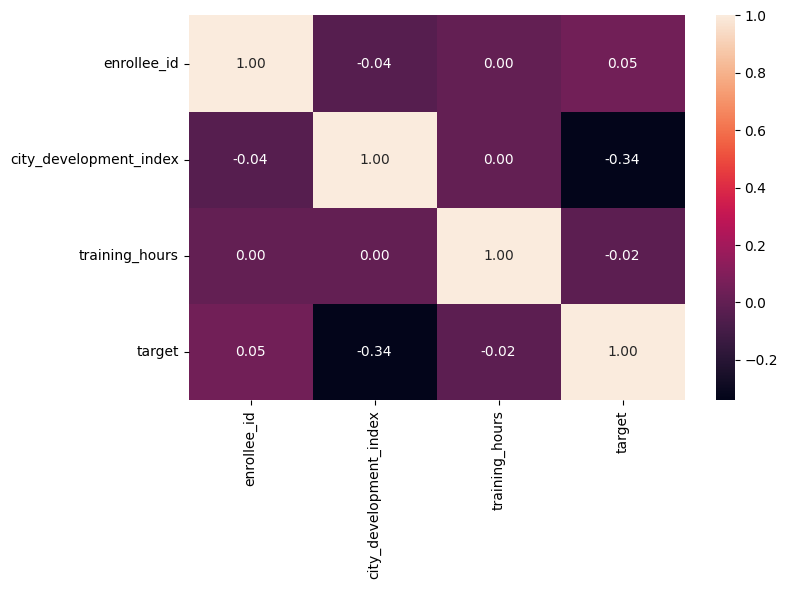

In [16]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Dari visualisasi diatas :
- Dari grafik heatmap diatas dapat dilihat korelasi antara feature dan target, berdasarkan garfik diatas diketahui korelasi target yang paling tinggi adalah dengan feature **city_development_index** sekitar -0.34,- yang artinya berkorelasi negatif.
- Selanjutnya antara target dan **training_hours** berkorelasi positif berkisar diangka 0.02, ini menunjukkan korelasi yang sangat lemah sehingga kolom training hours dapat di drop untuk analysis lebih lanjut. Tidak ditemukan korelasi diatas 0.7 antara sesama fitur. Ini berarti tidak ada yang berkorelasi kuat. Yang paling tinggi hanya terdapat diangka 0.34, dan dapat disimpulkan bahwa tidak ada feature yang redundan(berulang) tidak ada multikolinearitas.<br>

**Pola menarik:**
  - Semakin rendah nilai `city_development_index`, maka targetnya lebih banyak yang condong ke angka 1. Hal ini berarti ada korelasi dimana kandidat yang tinggal di kota kecil akan memiliki keinginan untuk melakukan perubahan pekerjaan.
  - Semakin kecil/sedikit waktu `training_hours`, maka targetnya lebih banyak yang condong ke angka 1. Ini menunjukkan korelasi negatif dimana semakin semakin sedikit *training hours* yang diikuti, semakin kandidat memiliki keinginan untuk mencari pekerjaan baru.

### Category Plot
Analisa feature numeric berdasarkan masing-masing feature categoric

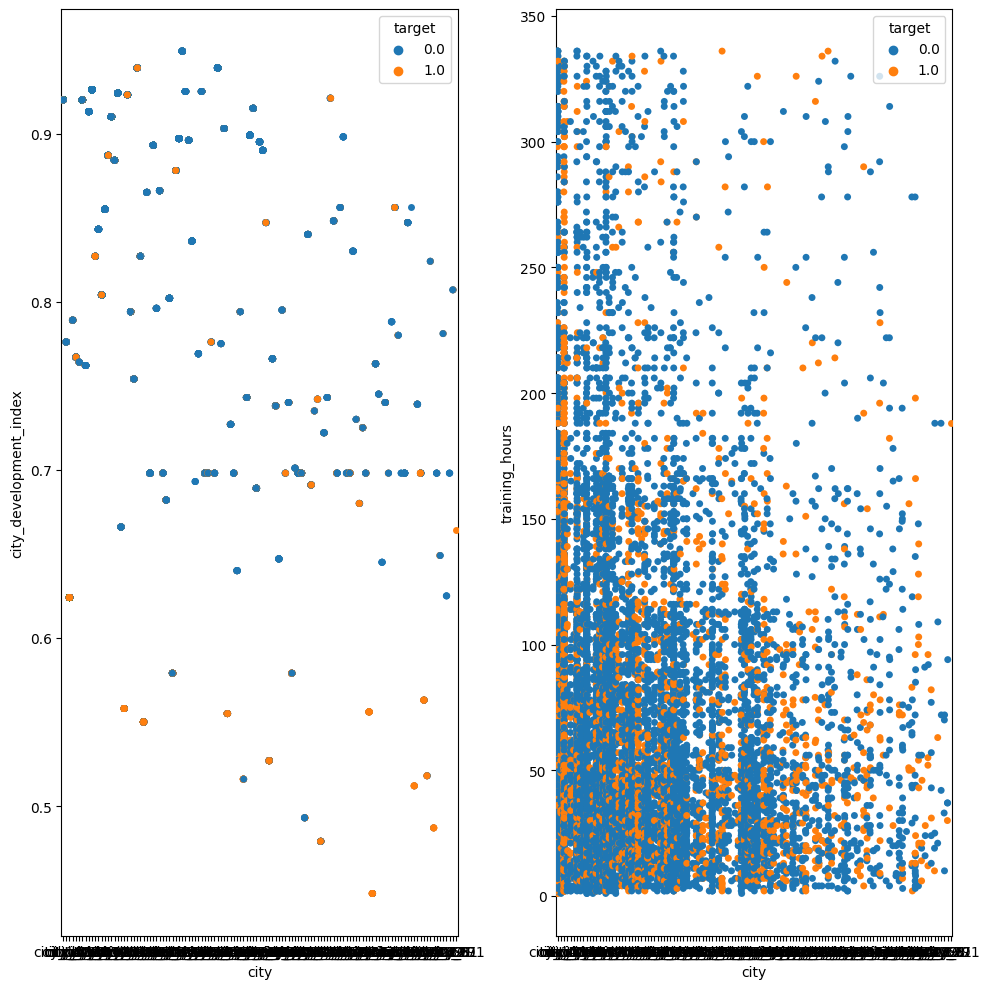

In [17]:
fig = plt.figure(figsize=(10, 10))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(1, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='city', y=nums[i], hue=df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

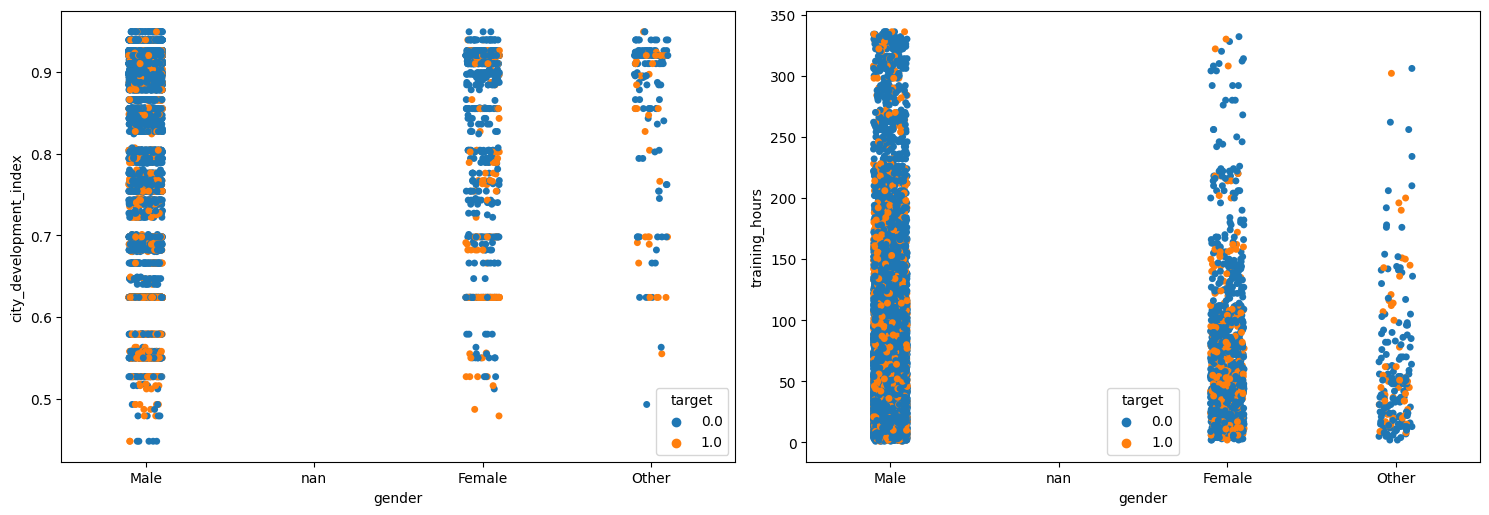

In [18]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='gender', y=nums[i], hue = df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

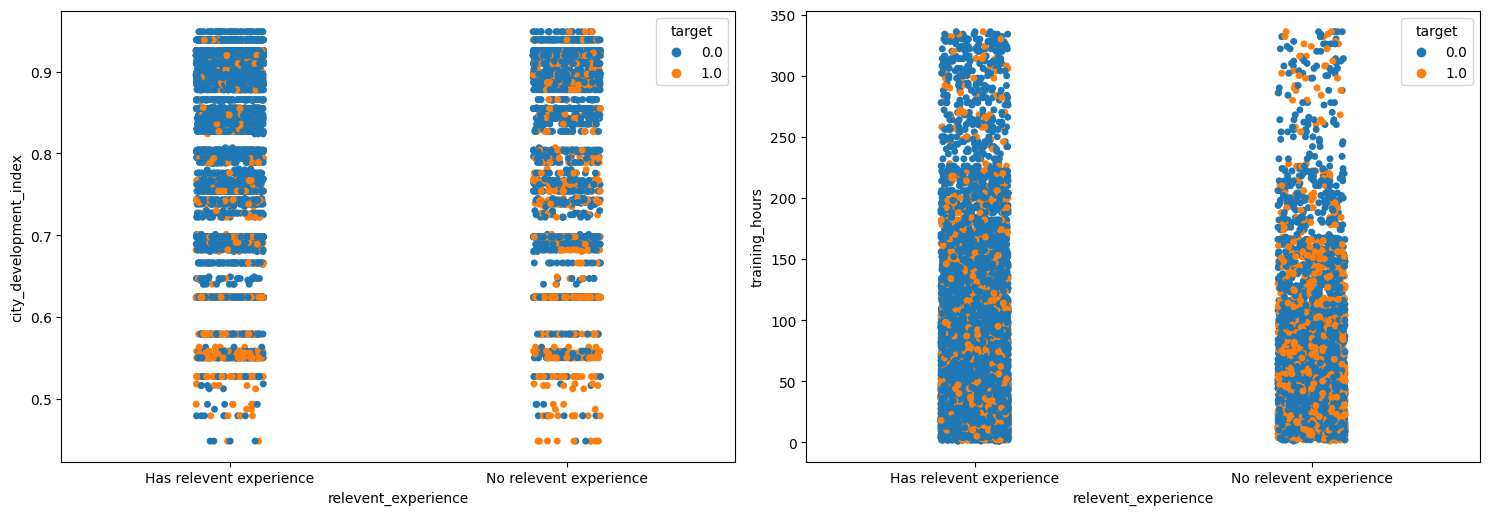

In [19]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='relevent_experience', y=nums[i], hue = df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

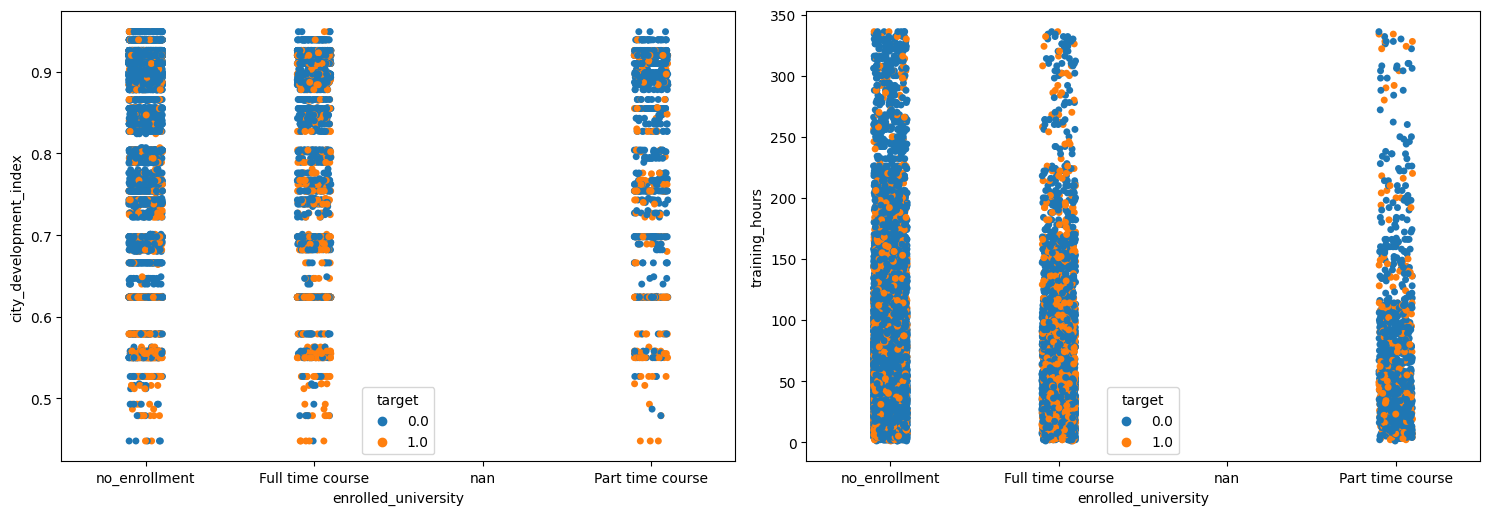

In [20]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='enrolled_university', y=nums[i], hue=df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

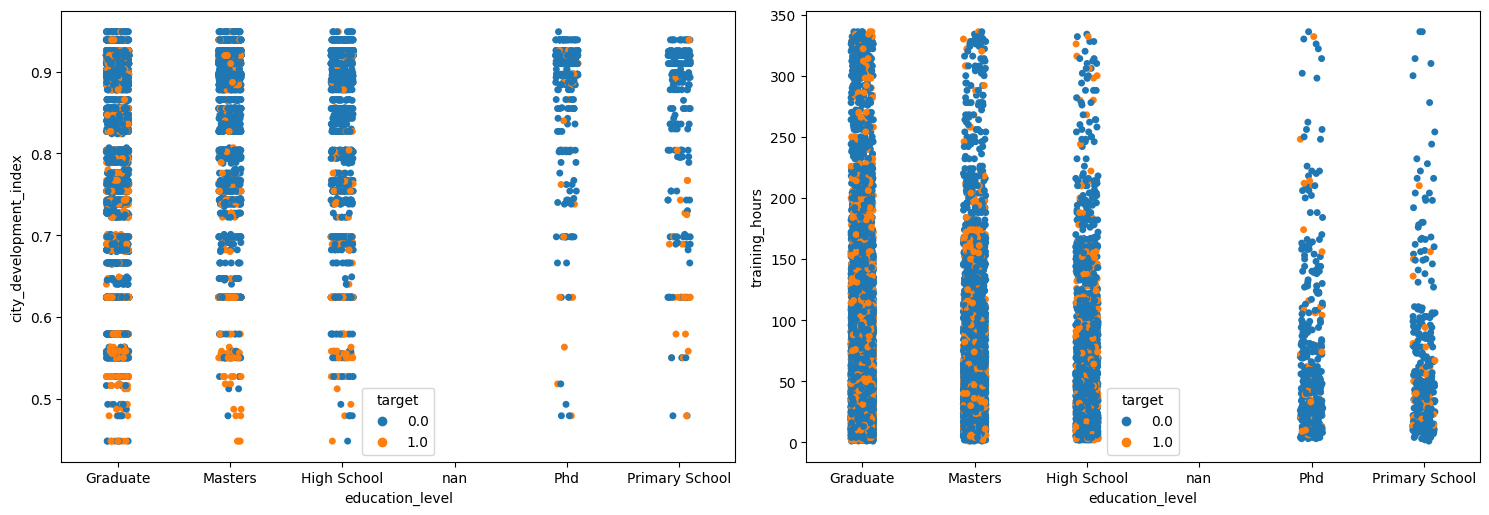

In [21]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='education_level', y=nums[i], hue=df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

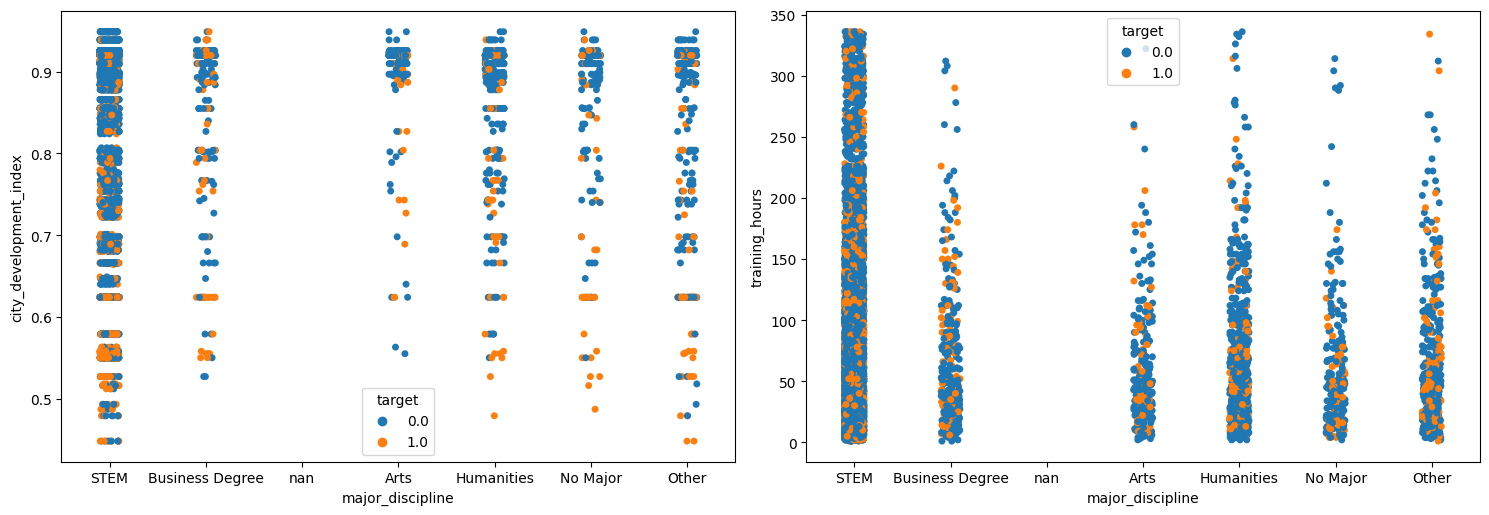

In [22]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='major_discipline', y=nums[i], hue=df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

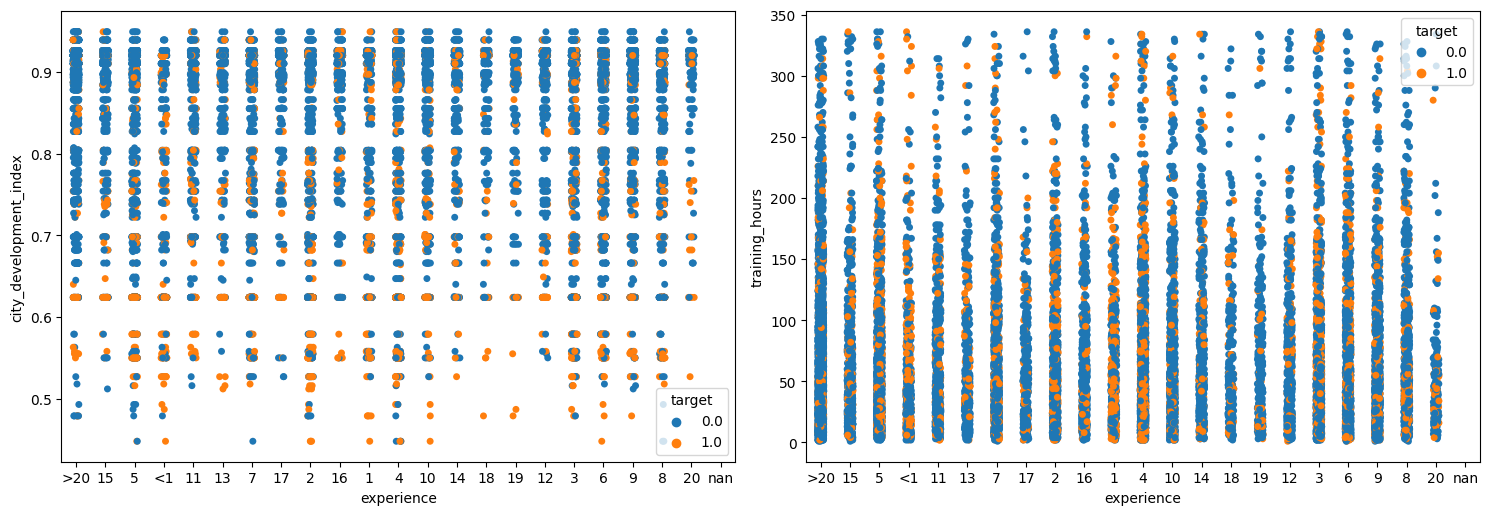

In [23]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='experience', y=nums[i], hue=df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

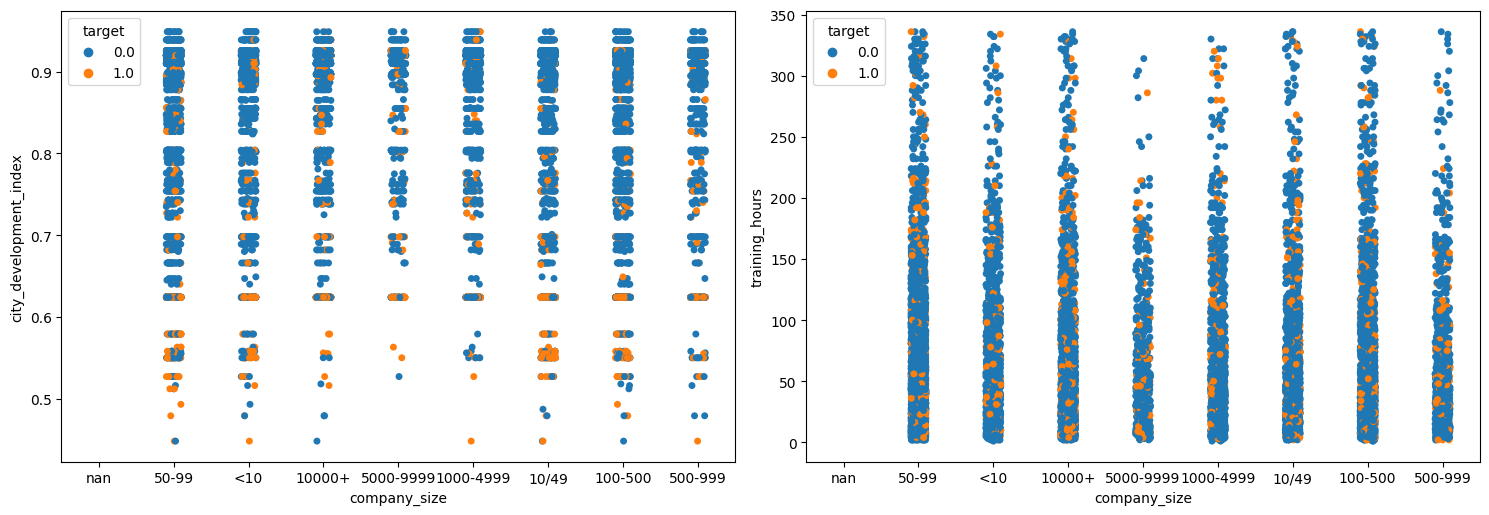

In [24]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='company_size', y=nums[i], hue=df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

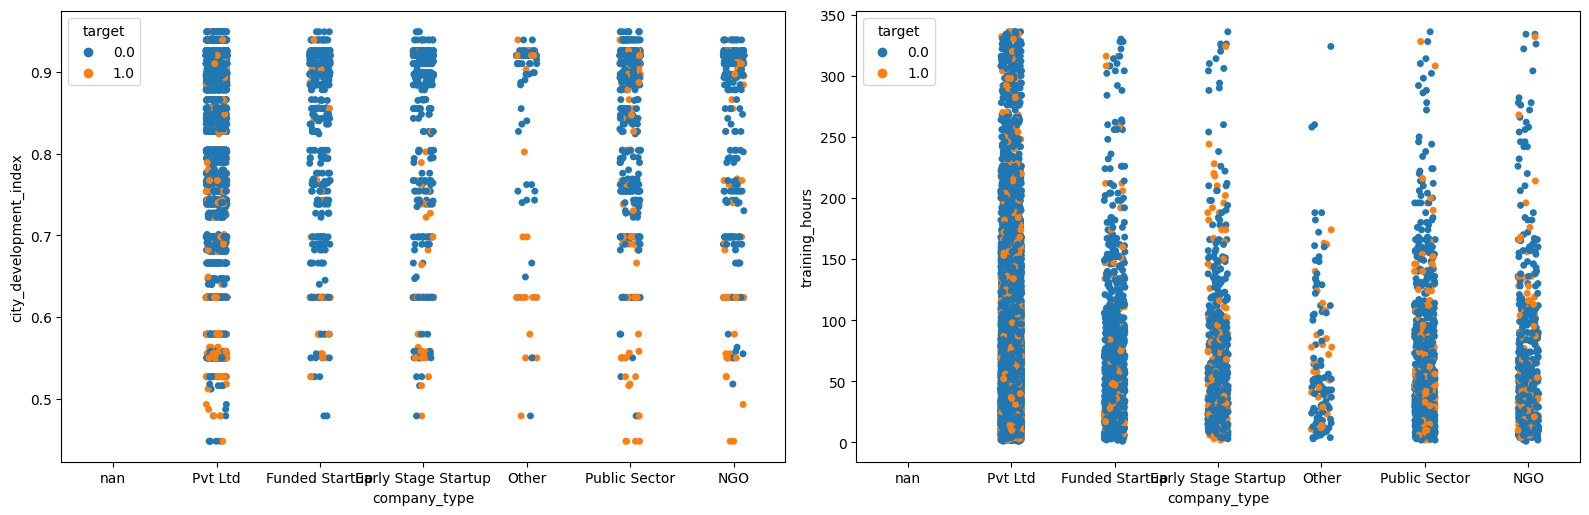

In [25]:
fig = plt.figure(figsize=(16, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='company_type', y=nums[i], hue=df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

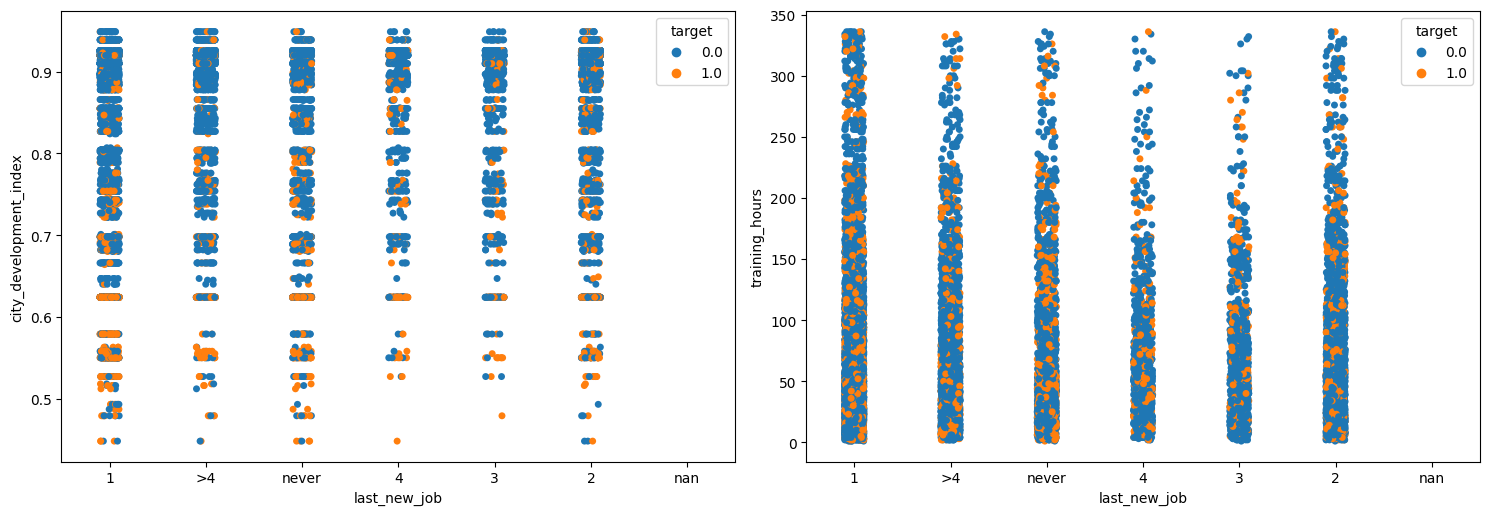

In [26]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='last_new_job', y=nums[i], hue=df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

Dari visualisasi diatas : <br>
tidak ditemukan data yang aneh antara 1 dengan lainnya (artinya : tidak ditemukan persebaran data 1 rendah dan 1 tinggi)

# **Business Insight**
- Jumlah kandidat yang ingin mencari perubahan pekerjaan dengan pengalaman yg relevan dengan Data Science adalah sebesar 2.961, dengan persentase sebanyak 21.4%, sedangkan jumlah kandidat yang ingin mencari perubahan pekerjaan namun tidak memiliki pengalaman yang relevan dengan Data Science (switch career) adalah sebesar 3.550, dengan persentase sebanyak 66.1%. <br>
Rekomendasi bisnis : Perusahaan bisa meninjau ulang untuk kandidat yang memiliki pengalaman yang relevan untuk switching career.
- Jumlah kandidat yang ingin mencari perubahan pekerjaan yang tidak berkuliah (bukan lulusan Universitas) relevan adalah sebesar 2.921, dengan persentase sebanyak 21.1%, sedangkan jumlah kandidat yang ingin mencari perubahan pekerjaan yang full time course (fokus kuliah saja) adalah sebesar 1.431, dengan persentase sebanyak 61.5%.<br>
Rekomendasi bisnis : persentase kandidat yang mencari perubahan pekerjaan bisa dinaikan dengan perusahaan dapat lebih mempromosikan benefit yang didapatkan dari training, salah satunya mendapatkan kesempatan dalam program penyaluran tenaga kerja perusahaan di bidang data scientist.
- Dari data kolom training_hours, dapat dilihat bahwa mayoritas kandidat dapat menyelesaikan training dalam jangka waktu kurang lebih antara 1-180 jam. Tetapi, terdapat data-data outliers yang menunjukkan adanya kandidat yang membutuhkan waktu lebih dari 180 jam untuk menyelesaikan training. Lebih fokus pada kandidat dengan training hours diatas 180, karena semakin lama waktu training yang dibutuhkan, akan memerlukan cost yang lebih besar.<br>
Rekomendasi bisnis : Perusahaan lebih memperhatikan dalam melakukan screening kelayakan kandidat untuk mengikuti training pada perusahaan, sehingga kandidat yang didapatkan adalah mereka yang benar-benar serius dan berpeluang lulus dalam waktu yang diharapkan.
- Berdasarkan kolom city_development_index, kota dengan city development index sekitar 0.62 - 0.78 (kota kecil), memiliki proporsi kandidat yang ingin mencari perubahan pekerjaan cukup banyak dibanding dengan kandidat yang tidak ingin mencari perubahan pekerjaan. <br>
Rekomendasi bisnis : Perusahaan bisa lebih memperhatikan asal kota dari tiap kandidat yang mendaftar, karena kandidat yang berasal dari kota-kota kecil memiliki peluang untuk mencari perubahan pekerjaan.

# **STAGE 2: Data Preprocessing**

# **Scenario 1 (Baseline)**

### Feature Selection

In [27]:
df_bl= pd.read_csv('https://raw.githubusercontent.com/she1031/tutorial_repo/main/aug_train%20(1).csv')
df_bl.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [28]:
df_bl = df_bl[['city', 'city_development_index', 'gender', 'relevent_experience',
          'enrolled_university', 'education_level', 'major_discipline', 'experience',
          'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']]

In [29]:
df_bl.drop(columns=['city'], axis=1, inplace=True)

## Feature Encoding

In [30]:
num = ['city_development_index', 'training_hours']
obj = ['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job']

for col in obj:
    print(f'''Value count kolom {col}:''')
    print(df_bl[col].value_counts())
    print()

Value count kolom gender:
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

Value count kolom relevent_experience:
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

Value count kolom enrolled_university:
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

Value count kolom education_level:
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

Value count kolom major_discipline:
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

Value count kolom experience:
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14  

In [31]:
# Rubah data
df_bl['last_new_job'] = df_bl['last_new_job'].replace('never', '0')
df_bl['last_new_job'] = df_bl['last_new_job'].replace('>4', '5')
df_bl['experience'] = df_bl['experience'].replace('<1', '0')
df_bl['experience'] = df_bl['experience'].replace('>20', '20')
df_bl['company_size'] = df_bl['company_size'].replace('10/49', '10-49')
df_bl['company_size'] = df_bl['company_size'].replace('<10', '0-9') # dirubah karena ketika dijalankan menggunakan model Xg-Boost terjadi error

In [32]:
#Label Encoding

performance_class = {"Primary School" : 0,
                     "High School" : 1,
                     "Graduate" : 2,
                     "Masters" : 3,
                     "Phd" : 4}
df_bl["education_level"] = df_bl["education_level"].map(performance_class).astype('category').cat.codes


relevant = {"Has relevent experience" : 1,
            "No relevent experience" : 0}
df_bl["relevent_experience"] = df_bl["relevent_experience"].map(relevant)


df_bl['experience'] = df_bl['experience'].astype('category').cat.codes
df_bl['last_new_job'] = df_bl['last_new_job'].astype('category').cat.codes

In [33]:
#One Hot Encoding
for cat in ['gender','enrolled_university','major_discipline','company_size','company_type']:
  onehots = pd.get_dummies(df_bl[cat], prefix=cat)
  df_bl = df_bl.join(onehots)

In [34]:
df_encod_bl = df_bl.drop(columns=['gender','enrolled_university','major_discipline','company_size','company_type']).copy()
df_encod_bl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   city_development_index                19158 non-null  float64
 1   relevent_experience                   19158 non-null  int64  
 2   education_level                       19158 non-null  int8   
 3   experience                            19158 non-null  int8   
 4   last_new_job                          19158 non-null  int8   
 5   training_hours                        19158 non-null  int64  
 6   target                                19158 non-null  float64
 7   gender_Female                         19158 non-null  uint8  
 8   gender_Male                           19158 non-null  uint8  
 9   gender_Other                          19158 non-null  uint8  
 10  enrolled_university_Full time course  19158 non-null  uint8  
 11  enrolled_univer

# **Scenario 2**



In [35]:
df_2 = df.copy()

In [36]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [37]:
# Rubah type data
df_2['target'] = df_2['target'].astype(int)
df_2['enrollee_id'] = df_2['enrollee_id'].astype(str)

### Handling Missing Value

In [38]:
df_2.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [39]:
# Rubah data
df_2['company_size'] = df_2['company_size'].replace('10/49', '10-49')
df_2['company_size'] = df_2['company_size'].replace('<10', '10') # dirubah karena ketika dijalankan menggunakan model Xg-Boost terjadi error
df_2['last_new_job'] = df_2['last_new_job'].replace('never', '0')
df_2['last_new_job'] = df_2['last_new_job'].replace('>4', '5')

In [40]:
df_2['gender'] = df_2['gender'].fillna('Other')
df_2['enrolled_university'].fillna(df_2['enrolled_university'].mode()[0], inplace=True)
df_2['education_level'].fillna(df_2['education_level'].mode()[0], inplace=True)
df_2['major_discipline'] = df_2['major_discipline'].fillna('Other')
df_2['experience'].fillna(df_2['experience'].mode()[0], inplace=True)
df_2['company_size'].fillna(df_2['company_size'].mode()[0], inplace=True)
df_2['company_type'] = df_2['company_type'].fillna('Other')
df_2['last_new_job'].fillna(df_2['last_new_job'].mode()[0], inplace=True)

**Note:**<br/>
Handling missing value masih bersifat temporary. Apabila setelah dicek performa model dengan handling seperti ini kurang memuaskan, maka akan dilakukan percobaan ulang pada tahap ini dan akan dicari cara penanganan yang lebih tepat agar dapat meningkatkan performa model.

### Handling Duplicated Data

In [41]:
df_2.duplicated().sum()

0

In [42]:
df_2.duplicated(subset=["enrollee_id"]).sum()

0

### Handling Invalid Values

In [43]:
df_2.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### Feature Extraction (Feature Engineering)

#### ***Membuat kolom* `experience_level`**

Untuk mengetahui kualifikasi dari tiap kandidat berdasarkan berapa tahun pengalaman di dunia kerja. Dapat dikategorikan menjadi beberapa level dan dibuat kolom baru `experience_level` untuk mempermudah analisis.
- `0` = novice
- `1-5` = Advanced beginner
- `6-15` = Competent
- `16-20` = Proficient
- `21` = Expert (diubah menjadi int8 sehingga valuenya menjadi 21)

Note:
- Range dari setiap level dapat di-*customize* berdasarkan kebutuhan.
- 0 = experience <1 dan 21 = experience >20 (karena kolom `experience` diubah dari tipe data object menjadi int8)

In [44]:
print(df_2["experience"].value_counts())

>20    3351
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64


In [45]:
# Membuat kolom baru experience_level
novice = '<1'
advanced_beginner = ['1', '2', '3', '4', '5']
competent = ['6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
proficient = ['16', '17', '18', '19', '20']
expert = '>20'

def get_experience_level(x):
    if x == novice:
        return 'novice'
    elif x in advanced_beginner:
        return 'advanced beginner'
    elif x in competent:
        return 'competent'
    elif x in proficient:
        return 'proficient'
    elif x == expert:
        return 'expert'
    else:
        return None

df_2['experience_level'] = df_2['experience'].apply(get_experience_level)

print(df_2['experience_level'].value_counts())

competent            7840
advanced beginner    5863
expert               3351
proficient           1582
novice                522
Name: experience_level, dtype: int64


#### ***Membuat kolom* `Graduate` *(unique value 'yes' dan 'no')***
Membedakan antara kandidat yang sudah lulus kuliah (graduate) atau yang tidak/belum kuliah (non-graduate). Berikut adalah beberapa alasan kenapa kita memerlukan feature ini dalam memilih kandidat job hiring:
- Menyelesaikan gelar universitas dapat menandakan tingkat komitmen dan disiplin tertentu. Pemberi kerja mungkin melihat kandidat lulusan sebagai orang yang telah menunjukkan kemampuan untuk menetapkan dan mencapai tujuan, dan memiliki ketekunan untuk menyelesaikan program yang menantang.
- Pendidikan universitas biasanya mencakup berbagai macam mata pelajaran yang memberikan dasar pengetahuan yang umum, seperti critical thinking, problem solving, communication dan research skill.
- Secara umum, memiliki gelar seringkali menjadi syarat untuk pekerjaan data scientist level entry, meskipun hal ini dapat bervariasi tergantung pada perusahaan dan persyaratan pekerjaan tertentu.

Kolom yang digunakan adalah `education_level` dimana penggunaan unique value-nya pada kolom baru `graduate` adalah sebagai berikut:
- 'Primary School' dan 'High School' = 'no'
- 'Graduate', 'Masters', 'Phd' = 'yes'


In [46]:
print(df_2["education_level"].value_counts())

Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64


In [47]:
# Membuat kolom baru graduate
yes = ['Graduate', 'Masters', 'Phd']
no = ['Primary School', 'High School']

def get_graduation_status(x):
    if x in yes:
        return 'yes'
    else:
        return 'no'

df_2['graduate'] = df_2['education_level'].apply(get_graduation_status)

print(df_2['graduate'].value_counts())

yes    16833
no      2325
Name: graduate, dtype: int64


In [48]:
df_2.sample(5)

enrollee_id      city  city_development_index gender  \
11980       24262   city_78                   0.579   Male   
1764        23642   city_11                   0.550   Male   
3052        31056  city_103                   0.920   Male   
8437         7127   city_46                   0.762  Other   
7775         5419  city_103                   0.920   Male   

           relevent_experience enrolled_university education_level  \
11980   No relevent experience    Full time course        Graduate   
1764    No relevent experience       no_enrollment        Graduate   
3052   Has relevent experience       no_enrollment        Graduate   
8437   Has relevent experience       no_enrollment        Graduate   
7775    No relevent experience       no_enrollment         Masters   

      major_discipline experience company_size company_type last_new_job  \
11980       Humanities         <1        50-99        Other            5   
1764              STEM          5        50-99        Other            0   
3052              STEM          9        50-99        Other            3   
8437              STEM          6        50-99          NGO            1   
7775              Arts          4        50-99        Other            1   

       training_hours  target   experience_level graduate  
11980              18       0             novice      yes  
1764               37       1  advanced beginner      yes  
3052               52       1          competent      yes  
8437               22       0          competent      yes  
7775                6       1  advanced beginner      yes

### Feature Selection (Feature Engineering)

**`Drop Features enrollee_id dan city`**

Kolom `city` didrop karena memiliki jumlah unique values yang tinggi.`experience` juga di-drop karena di bagian feature extraction, kita telah membuat kolom baru. Sedangkan `education_level` juga telah dilakukan pembuatan kolom baru, tapi, akan tetap memasukkan kolom `education_level` untuk diuji performa modelnya terlebih dahulu.

In [49]:
# Drop feature enrollee_id, city

df_encod_2 = df_2.drop(columns=["enrollee_id","city","experience"]).copy()

**Notes:** <br/>
Karena jumlah data dan feature dalam dataset ini termasuk sedikit, semua fitur (kecuali enrollee_id) akan digunakan untuk machine learning.Setelah proses modelling, dapat dilihat mana fitur yang penting dan mana yang tidak, sehingga fitur yang tidak penting dapat di-drop.

#### ***Heatmap Correlation Plot***

In [50]:
#plt.figure(figsize=(20, 20))
#sns.heatmap(smote_X_train.corr(), cmap='Blues', annot=True, fmt='.2f')

Pada dataset ini, heatmap correlation plot tidak digunakan untuk feature selection. Heatmap corrplot hanya mengecek hubungan linear antara fitur, sehingga bisa saja ada fitur yang penting namun memiliki hubungan non-linear yang tidak terlihat pada heatmap corrplot.

#### ***Additional Features***
#### **`Unemployment Duration`** <br/>
Jika diberikan kesempatan untuk bekerja sebagai data scientist, orang yang telah menganggur dalam waktu yang lama pasti akan tertarik untuk mengambil kesempatan ini dan beralih profesi. <br/>
 <br/>
#### **`Salary`** <br/>
Jika kita menawarkan gaji sebesar xxx, maka kemungkinan orang yang saat ini menerima gaji di bawah jumlah tersebut akan lebih tinggi untuk mempertimbangkan perubahan pekerjaan. <br/>
 <br/>
#### **`Relevance between current job and major discipline`** <br/>
Orang yang memiliki latar belakang pekerjaan di luar disiplin ilmu STEM atau disiplin ilmu yang relevan dengan bidang data science berkemungkinan tinggi untuk mempertimbangkan beralih profesi ke bidang data science jika diberikan kesempatan dalam program data scientist hiring. <br/>
 <br/>
#### **`Age`** <br/>
Orang yang telah memasuki usia tua cenderung kurang berminat untuk mengganti pekerjaan lagi. Alasannya bisa berupa: <br/>
- Sudah memiliki pengalaman dan keterampilan pada bidang pekerjaannya sekarang yang telah dikembangkan bertahun-tahun. <br/>
- Sudah nyaman dengan perusahaan yang sekarang dan cenderung merasa sulit untuk beradaptasi dengan work culture yang baru.

### Handling Outliers (Numeric)

Ada dua cara untuk meng-handle outliers, antara lain:
- z-score
- IQR

Berikut adalah perbedaan, kekurangan, dan kelebihan dari metode z-score dan IQR dalam menghandle outliers (ChatGPT, 2023):

Perbedaan: <br/>
- Z-score mengukur seberapa jauh nilai dari rata-rata dalam satuan standar deviasi, sedangkan IQR menghitung jarak antara kuartil atas dan kuartil bawah dalam distribusi data.
- Z-score bergantung pada rata-rata dan standar deviasi dari seluruh data, sedangkan IQR hanya bergantung pada kuartil atas dan kuartil bawah yang dihitung dari setengah data tengah.
- Z-score cocok digunakan pada data dengan distribusi normal, sedangkan IQR lebih tahan terhadap pencilan (outliers) dan dapat digunakan pada data dengan distribusi yang tidak normal.

Kekurangan:
- Z-score rentan terhadap outliers yang sangat ekstrem, karena standar deviasi dipengaruhi oleh outliers. Jika ada beberapa outlier yang sangat ekstrem, mereka dapat memberi dampak yang signifikan pada standar deviasi, sehingga menimbulkan kesalahan dalam pengukuran jarak data dari rata-rata.
- IQR dapat menghasilkan batas atas dan bawah yang terlalu longgar atau terlalu ketat jika data memiliki banyak atau sedikit outliers.
Kelebihan:
- Z-score dapat digunakan untuk menentukan nilai-nilai yang jauh dari norma, yaitu data yang terlalu besar atau terlalu kecil.
IQR dapat memfilter outlier dengan lebih baik daripada Z-score, terutama pada data yang tidak terdistribusi secara normal.
Dalam memilih metode untuk menghandle outliers, penting untuk mempertimbangkan sifat dataset yang digunakan serta karakteristik dari masing-masing metode.

*(only for reference)*

### ***z-score***

In [51]:
#from scipy import stats
#print(f'Jumlah baris sebelum memfilter outlier: {len(df_2)}')

#filtered_entries = np.array([True] * len(df_2))

#for col in ['city_development_index',	'training_hours']:
    #zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    #filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

#df_2 = df_2[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

#print(f'Jumlah baris setelah memfilter outlier: {len(df_2)}')

### ***IQR***

In [52]:
df_iqr = df_encod_2.copy()

In [53]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_iqr)}')

filtered_entries = np.array([True] * len(df_iqr))
for col in ['city_development_index',	'training_hours']:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_iqr[col] >= low_limit) & (df_iqr[col] <= high_limit)) & filtered_entries

df_iqr = df_iqr[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_iqr)}')

Jumlah baris sebelum memfilter outlier: 19158
Jumlah baris setelah memfilter outlier: 18157


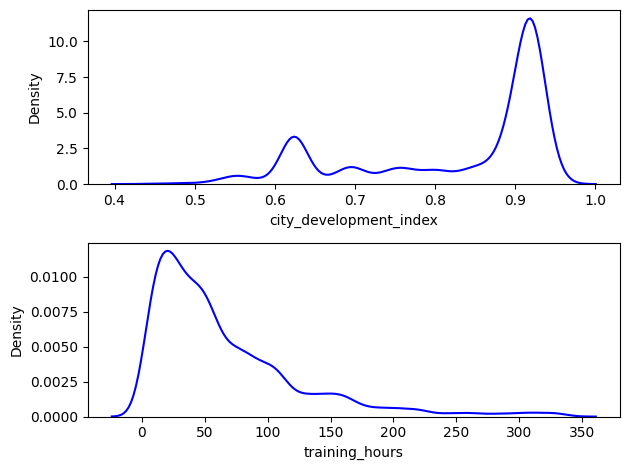

In [54]:
#df_2 (before IQR)
num = ['city_development_index', 'training_hours']
obj = ['city','gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'experience_level', 'graduate']

for i in range(0, len(num)):
    plt.subplot(2,1, i+1)
    sns.kdeplot(x = df_2[num[i]], color='blue')
    plt.xlabel(num[i])

plt.tight_layout()

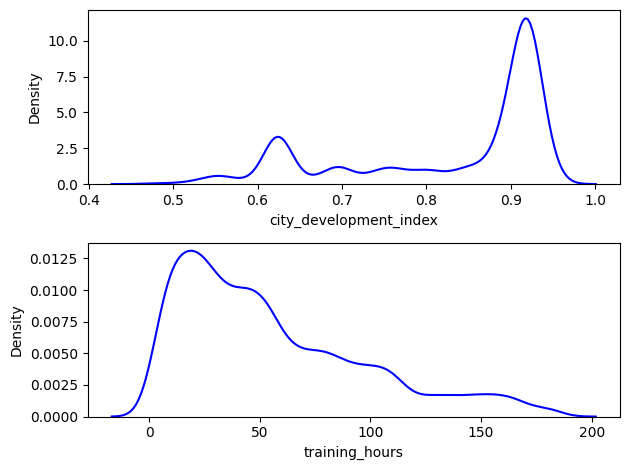

In [55]:
 # df_iqr (after IQR)
num = ['city_development_index', 'training_hours']
obj = ['city','gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'experience_level', 'graduate']

for i in range(0, len(num)):
    plt.subplot(2,1, i+1)
    sns.kdeplot(x = df_iqr[num[i]], color='blue')
    plt.xlabel(num[i])

plt.tight_layout()

### Feature Transformation (Numeric)

Skewed distribution =  MinMaxScaler <br/>
Normal distribution = StandardScaler <br/>
 <br/>
**Note:** <br/>
Tidak boleh menggunakan keduanya secara bersamaan.
<br/>


Karena data berdistribusi skewed, maka sebaiknya menggunakan normalisasi

In [56]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_iqr['city_development_index_norm'] = MinMaxScaler().fit_transform(df_iqr['city_development_index'].values.reshape(len(df_iqr), 1))
df_iqr['training_hours_norm'] = MinMaxScaler().fit_transform(df_iqr['training_hours'].values.reshape(len(df_iqr), 1))

In [57]:
df_iqr[['city_development_index','city_development_index_norm','training_hours','training_hours_norm']].describe()

city_development_index  city_development_index_norm  training_hours  \
count            18157.000000                 18157.000000    18157.000000   
mean                 0.829318                     0.745357       55.507518   
std                  0.122815                     0.261309       42.311416   
min                  0.479000                     0.000000        1.000000   
25%                  0.740000                     0.555319       22.000000   
50%                  0.903000                     0.902128       45.000000   
75%                  0.920000                     0.938298       80.000000   
max                  0.949000                     1.000000      184.000000   

       training_hours_norm  
count         18157.000000  
mean              0.297855  
std               0.231210  
min               0.000000  
25%               0.114754  
50%               0.240437  
75%               0.431694  
max               1.000000

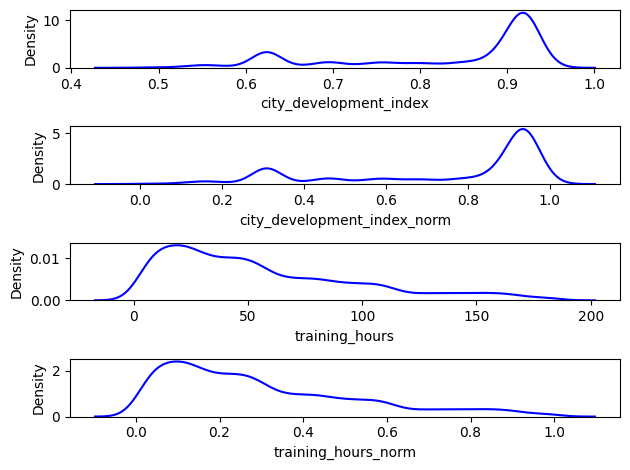

In [58]:
num = ['city_development_index', 'city_development_index_norm', 'training_hours','training_hours_norm']

for i in range(0, len(num)):
    plt.subplot(4,1, i+1)
    sns.kdeplot(x = df_iqr[num[i]], color='blue')
    plt.xlabel(num[i])

plt.tight_layout()

### Feature Encoding (Categorical)

In [59]:
obj = ['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline','company_size', 'company_type',
       'last_new_job', 'experience_level', 'graduate']

for col in obj:
    print(f'''Value count kolom {col}:''')
    print(df_iqr[col].value_counts())
    print()

Value count kolom gender:
Male      12539
Other      4442
Female     1176
Name: gender, dtype: int64

Value count kolom relevent_experience:
Has relevent experience    13083
No relevent experience      5074
Name: relevent_experience, dtype: int64

Value count kolom enrolled_university:
no_enrollment       13482
Full time course     3559
Part time course     1116
Name: enrolled_university, dtype: int64

Value count kolom education_level:
Graduate          11405
Masters            4168
High School        1913
Phd                 383
Primary School      288
Name: education_level, dtype: int64

Value count kolom major_discipline:
STEM               13734
Other               3019
Humanities           635
Business Degree      308
Arts                 246
No Major             215
Name: major_discipline, dtype: int64

Value count kolom company_size:
50-99        8544
100-500      2441
10000+       1914
10-49        1381
1000-4999    1266
10           1238
500-999       828
5000-9999     545
Na

In [60]:
#Label Encoding

performance_class = {"Primary School" : 0,
                     "High School" : 1,
                     "Graduate" : 2,
                     "Masters" : 3,
                     "Phd" : 4}
df_iqr["education_level"] = df_iqr["education_level"].map(performance_class).astype('category').cat.codes


relevant = {"Has relevent experience" : 1,
            "No relevent experience" : 0}
df_iqr["relevent_experience"] = df_iqr["relevent_experience"].map(relevant)



exp_level = {"novice" : 0,
             "advanced beginner" : 1,
             "competent" : 2,
             "proficient" : 3,
              "expert" : 4}
df_iqr["experience_level"] = df_iqr["experience_level"].map(exp_level).astype('category').cat.codes

df_iqr['last_new_job'] = df_iqr['last_new_job'].astype('category').cat.codes

In [61]:
#One Hot Encoding
for cat in ['gender','enrolled_university','major_discipline',
            'company_size','company_type','graduate']:
  onehots = pd.get_dummies(df_iqr[cat], prefix=cat)
  df_iqr = df_iqr.join(onehots)

In [62]:
df_encod_drop = df_iqr.drop(columns=['gender','enrolled_university','major_discipline',
                                  'company_size','company_type','graduate',
                                  'training_hours','city_development_index']).copy()
df_encod_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18157 entries, 0 to 19157
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   relevent_experience                   18157 non-null  int64  
 1   education_level                       18157 non-null  int8   
 2   last_new_job                          18157 non-null  int8   
 3   target                                18157 non-null  int64  
 4   experience_level                      18157 non-null  int8   
 5   city_development_index_norm           18157 non-null  float64
 6   training_hours_norm                   18157 non-null  float64
 7   gender_Female                         18157 non-null  uint8  
 8   gender_Male                           18157 non-null  uint8  
 9   gender_Other                          18157 non-null  uint8  
 10  enrolled_university_Full time course  18157 non-null  uint8  
 11  enrolled_univer

### Handling Class Imbalance - Oversampling

Ada 2 cara yang dapat digunakan untuk mengatasi class imbalance, yaitu:
- Oversampling
- Undersampling

Coba keduanya dan dibandingkan.


Note: <br/>
- [ ] ada mild (20-40%), moderate (1-20%), extreme (<1%)
- [ ] harus dijadikan presentase
- [ ] ini 33% jadi masuk ke mild jadi harus dilakukan handling, kecuali dia diatas mild.
- [ ] pas kerja kalo bisa harus menghindari smote ini.

In [63]:
df_encod_drop.sample(5)

relevent_experience  education_level  last_new_job  target  \
14133                    1                3             2       1   
6461                     1                2             2       0   
13499                    0                2             0       0   
10072                    1                2             1       0   
4575                     1                2             2       0   

       experience_level  city_development_index_norm  training_hours_norm  \
14133                 2                     0.308511             0.868852   
6461                  2                     0.889362             0.256831   
13499                 1                     0.889362             0.169399   
10072                 2                     0.308511             0.338798   
4575                  1                     0.938298             0.289617   

       gender_Female  gender_Male  gender_Other  ...  company_size_500-999  \
14133              0            1             0  ...                     0   
6461               0            1             0  ...                     0   
13499              0            1             0  ...                     0   
10072              0            1             0  ...                     0   
4575               0            1             0  ...                     0   

       company_size_5000-9999  company_type_Early Stage Startup  \
14133                       0                                 0   
6461                        0                                 0   
13499                       0                                 0   
10072                       0                                 0   
4575                        0                                 0   

       company_type_Funded Startup  company_type_NGO  company_type_Other  \
14133                            0                 0                   1   
6461                             0                 0                   0   
13499                            0                 0                   1   
10072                            0                 0                   1   
4575                             0                 0                   1   

       company_type_Public Sector  company_type_Pvt Ltd  graduate_no  \
14133                           0                     0            0   
6461                            0                     1            0   
13499                           0                     0            0   
10072                           0                     0            0   
4575                            0                     0            0   

       graduate_yes  
14133             1  
6461              1  
13499             1  
10072             1  
4575              1  

[5 rows x 35 columns]

In [64]:
#pip install -U imbalanced-learn

In [65]:
x = df_encod_drop.drop(["target"], axis=1)
y = df_encod_drop["target"]

In [66]:
# Cek jumlah target sebelum di imbalance (apakah sudah sama atau belum)
y.value_counts()

0    13601
1     4556
Name: target, dtype: int64

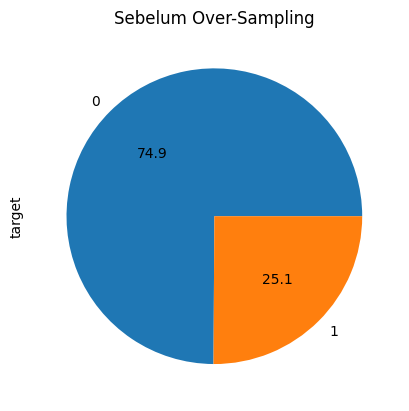

In [67]:
ax = y.value_counts().plot.pie(autopct='%.1f')
_ = ax.set_title("Sebelum Over-Sampling")

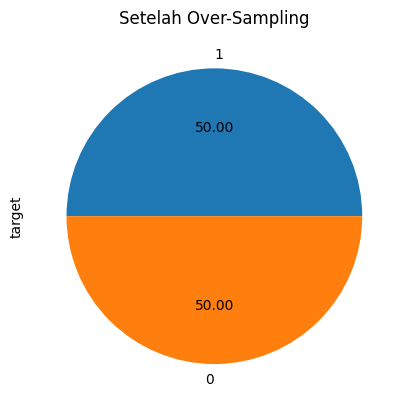

In [68]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
x_over, y_over = ros.fit_resample(x, y)

ax = y_over.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Setelah Over-Sampling")

In [69]:
y_over.value_counts()

1    13601
0    13601
Name: target, dtype: int64

# **Scenario 3**

In [70]:
df_3 = df.copy()

In [71]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [72]:
# Rubah type data
df_3['target'] = df_3['target'].astype(int)
df_3['enrollee_id'] = df_3['enrollee_id'].astype(str)

### Handling Missing Value

In [73]:
df_3.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [74]:
# Rubah data
df_3['company_size'] = df_3['company_size'].replace('10/49', '10-49')
df_3['company_size'] = df_3['company_size'].replace('<10', '10') # dirubah karena ketika dijalankan menggunakan model Xg-Boost terjadi error
df_3['last_new_job'] = df_3['last_new_job'].replace('never', '0')
df_3['last_new_job'] = df_3['last_new_job'].replace('>4', '5')

In [75]:
df_3['gender'] = df_3['gender'].fillna('Other')
df_3['enrolled_university'].fillna(df_3['enrolled_university'].mode()[0], inplace=True)
df_3['education_level'].fillna(df_3['education_level'].mode()[0], inplace=True)
df_3['major_discipline'] = df_3['major_discipline'].fillna('Other')
df_3['experience'].fillna(df_3['experience'].mode()[0], inplace=True)
df_3['company_size'].fillna(df_3['company_size'].mode()[0], inplace=True)
df_3['company_type'] = df_3['company_type'].fillna('Other')
df_3['last_new_job'].fillna(df_3['last_new_job'].mode()[0], inplace=True)

### Handling Duplicated Data

In [76]:
df_3.duplicated().sum()

0

In [77]:
df_3.duplicated(subset=["enrollee_id"]).sum()

0

### Handling Invalid Values

In [78]:
df_3.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### Feature Extraction (Feature Engineering)

In [79]:
print(df_3["experience"].value_counts())

>20    3351
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64


In [80]:
# Membuat kolom baru experience_level
novice = '<1'
advanced_beginner = ['1', '2', '3', '4', '5']
competent = ['6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
proficient = ['16', '17', '18', '19', '20']
expert = '>20'

def get_experience_level(x):
    if x == novice:
        return 'novice'
    elif x in advanced_beginner:
        return 'advanced beginner'
    elif x in competent:
        return 'competent'
    elif x in proficient:
        return 'proficient'
    elif x == expert:
        return 'expert'
    else:
        return None

df_3['experience_level'] = df_3['experience'].apply(get_experience_level)

print(df_3['experience_level'].value_counts())

competent            7840
advanced beginner    5863
expert               3351
proficient           1582
novice                522
Name: experience_level, dtype: int64


In [81]:
print(df_2["education_level"].value_counts())

Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64


In [82]:
# Membuat kolom baru graduate
yes = ['Graduate', 'Masters', 'Phd']
no = ['Primary School', 'High School']

def get_graduation_status(x):
    if x in yes:
        return 'yes'
    else:
        return 'no'

df_3['graduate'] = df_3['education_level'].apply(get_graduation_status)

print(df_3['graduate'].value_counts())

yes    16833
no      2325
Name: graduate, dtype: int64


In [83]:
df_3.sample(5)

enrollee_id      city  city_development_index gender  \
12436       16316  city_162                   0.767  Other   
1375         7537  city_103                   0.920   Male   
2116        21294   city_90                   0.698  Other   
18523       20593  city_114                   0.926   Male   
18199       26084   city_21                   0.624   Male   

           relevent_experience enrolled_university education_level  \
12436  Has relevent experience    Full time course        Graduate   
1375   Has relevent experience    Full time course        Graduate   
2116    No relevent experience    Part time course        Graduate   
18523  Has relevent experience       no_enrollment        Graduate   
18199  Has relevent experience       no_enrollment        Graduate   

      major_discipline experience company_size company_type last_new_job  \
12436             STEM        >20      100-500      Pvt Ltd            5   
1375              STEM         11        50-99        Other            1   
2116              STEM          2           10      Pvt Ltd            1   
18523             STEM         14    1000-4999      Pvt Ltd            3   
18199             STEM         10        50-99      Pvt Ltd            1   

       training_hours  target   experience_level graduate  
12436              46       0             expert      yes  
1375               55       0          competent      yes  
2116               98       1  advanced beginner      yes  
18523              70       0          competent      yes  
18199             330       0          competent      yes

### Feature Selection (Feature Engineering)

**`Drop Features enrollee_id, city, experience`**

In [84]:
# Drop feature enrollee_id, city, dan experience
df_select_3 = df_3.drop(columns=["enrollee_id","city","experience"]).copy()


### Handling Outliers (Numeric)

### ***IQR***

In [85]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_select_3)}')

filtered_entries = np.array([True] * len(df_select_3))
for col in ['city_development_index',	'training_hours']:
    Q1 = df_select_3[col].quantile(0.25)
    Q3 = df_select_3[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_select_3[col] >= low_limit) & (df_select_3[col] <= high_limit)) & filtered_entries

df_select_3 = df_select_3[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_select_3)}')

Jumlah baris sebelum memfilter outlier: 19158
Jumlah baris setelah memfilter outlier: 18157


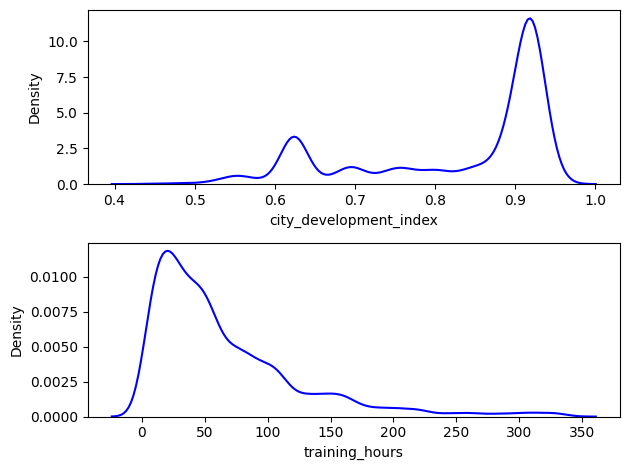

In [86]:
#df (before IQR)
num = ['city_development_index', 'training_hours']
obj = ['city','gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'experience_level', 'graduate']

for i in range(0, len(num)):
    plt.subplot(2,1, i+1)
    sns.kdeplot(x = df[num[i]], color='blue')
    plt.xlabel(num[i])

plt.tight_layout()

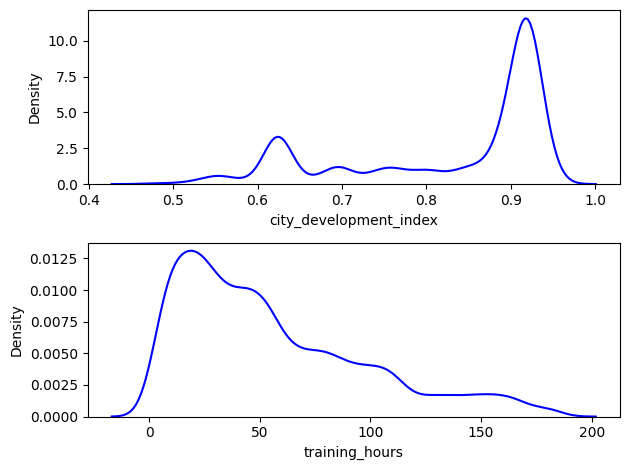

In [87]:
# df_3 (after IQR)
num = ['city_development_index', 'training_hours']
obj = ['city','gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'experience_level', 'graduate']

for i in range(0, len(num)):
    plt.subplot(2,1, i+1)
    sns.kdeplot(x = df_select_3[num[i]], color='blue')
    plt.xlabel(num[i])

plt.tight_layout()

### Feature Transformation (Numeric)

Skewed distribution =  MinMaxScaler <br/>
Normal distribution = StandardScaler <br/>
 <br/>

In [88]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_select_3['city_development_index_norm'] = MinMaxScaler().fit_transform(df_select_3['city_development_index'].values.reshape(len(df_select_3), 1))
df_select_3['training_hours_norm'] = MinMaxScaler().fit_transform(df_select_3['training_hours'].values.reshape(len(df_select_3), 1))

In [89]:
df_select_3[['city_development_index','city_development_index_norm','training_hours','training_hours_norm']].describe()

city_development_index  city_development_index_norm  training_hours  \
count            18157.000000                 18157.000000    18157.000000   
mean                 0.829318                     0.745357       55.507518   
std                  0.122815                     0.261309       42.311416   
min                  0.479000                     0.000000        1.000000   
25%                  0.740000                     0.555319       22.000000   
50%                  0.903000                     0.902128       45.000000   
75%                  0.920000                     0.938298       80.000000   
max                  0.949000                     1.000000      184.000000   

       training_hours_norm  
count         18157.000000  
mean              0.297855  
std               0.231210  
min               0.000000  
25%               0.114754  
50%               0.240437  
75%               0.431694  
max               1.000000

### Feature Encoding (Categorical)

In [90]:
obj = ['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'last_new_job', 'experience_level', 'graduate']

for col in obj:
    print(f'''Value count kolom {col}:''')
    print(df_select_3[col].value_counts())
    print()

Value count kolom gender:
Male      12539
Other      4442
Female     1176
Name: gender, dtype: int64

Value count kolom relevent_experience:
Has relevent experience    13083
No relevent experience      5074
Name: relevent_experience, dtype: int64

Value count kolom enrolled_university:
no_enrollment       13482
Full time course     3559
Part time course     1116
Name: enrolled_university, dtype: int64

Value count kolom education_level:
Graduate          11405
Masters            4168
High School        1913
Phd                 383
Primary School      288
Name: education_level, dtype: int64

Value count kolom major_discipline:
STEM               13734
Other               3019
Humanities           635
Business Degree      308
Arts                 246
No Major             215
Name: major_discipline, dtype: int64

Value count kolom company_size:
50-99        8544
100-500      2441
10000+       1914
10-49        1381
1000-4999    1266
10           1238
500-999       828
5000-9999     545
Na

In [91]:
#Label Encoding

performance_class = {"Primary School" : 0,
                     "High School" : 1,
                     "Graduate" : 2,
                     "Masters" : 3,
                     "Phd" : 4}
df_select_3["education_level"] = df_select_3["education_level"].map(performance_class).astype('category').cat.codes


relevant = {"Has relevent experience" : 1,
            "No relevent experience" : 0}
df_select_3["relevent_experience"] = df_select_3["relevent_experience"].map(relevant)



exp_level = {"novice" : 0,
             "advanced beginner" : 1,
             "competent" : 2,
             "proficient" : 3,
              "expert" : 4}
df_select_3["experience_level"] = df_select_3["experience_level"].map(exp_level).astype('category').cat.codes

df_select_3['last_new_job'] = df_select_3['last_new_job'].astype('category').cat.codes

In [92]:
#One Hot Encoding
for cat in ['gender','enrolled_university','major_discipline',
            'company_size','company_type','graduate']:
  onehots = pd.get_dummies(df_select_3[cat], prefix=cat)
  df_select_3 = df_select_3.join(onehots)

In [93]:
df_encod_3 = df_select_3.drop(columns=['gender','enrolled_university','major_discipline',
                                  'company_size','company_type','graduate',
                                  'training_hours','city_development_index']).copy()
df_encod_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18157 entries, 0 to 19157
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   relevent_experience                   18157 non-null  int64  
 1   education_level                       18157 non-null  int8   
 2   last_new_job                          18157 non-null  int8   
 3   target                                18157 non-null  int64  
 4   experience_level                      18157 non-null  int8   
 5   city_development_index_norm           18157 non-null  float64
 6   training_hours_norm                   18157 non-null  float64
 7   gender_Female                         18157 non-null  uint8  
 8   gender_Male                           18157 non-null  uint8  
 9   gender_Other                          18157 non-null  uint8  
 10  enrolled_university_Full time course  18157 non-null  uint8  
 11  enrolled_univer

### Handling Class Imbalance - Undersampling

In [94]:
df_encod_3.sample(5)

relevent_experience  education_level  last_new_job  target  \
2416                     0                2             2       0   
12430                    0                1             1       1   
5126                     0                1             0       0   
16698                    1                3             1       0   
9014                     0                3             1       0   

       experience_level  city_development_index_norm  training_hours_norm  \
2416                  1                     0.938298             0.125683   
12430                 2                     0.308511             0.081967   
5126                  2                     0.612766             0.349727   
16698                 1                     0.397872             0.060109   
9014                  1                     0.691489             0.240437   

       gender_Female  gender_Male  gender_Other  ...  company_size_500-999  \
2416               0            1             0  ...                     0   
12430              0            0             1  ...                     0   
5126               0            1             0  ...                     0   
16698              0            1             0  ...                     0   
9014               0            1             0  ...                     0   

       company_size_5000-9999  company_type_Early Stage Startup  \
2416                        0                                 0   
12430                       0                                 0   
5126                        0                                 0   
16698                       0                                 0   
9014                        0                                 0   

       company_type_Funded Startup  company_type_NGO  company_type_Other  \
2416                             0                 0                   0   
12430                            0                 0                   1   
5126                             0                 0                   0   
16698                            0                 1                   0   
9014                             0                 0                   0   

       company_type_Public Sector  company_type_Pvt Ltd  graduate_no  \
2416                            0                     1            0   
12430                           0                     0            1   
5126                            0                     1            1   
16698                           0                     0            0   
9014                            1                     0            0   

       graduate_yes  
2416              1  
12430             0  
5126              0  
16698             1  
9014              1  

[5 rows x 35 columns]

In [95]:
#pip install -U imbalanced-learn

In [96]:
x = df_encod_3.drop(["target"], axis=1)
y = df_encod_3["target"]

In [97]:
# Cek jumlah target sebelum di imbalance (apakah sudah sama atau belum)
y.value_counts()

0    13601
1     4556
Name: target, dtype: int64

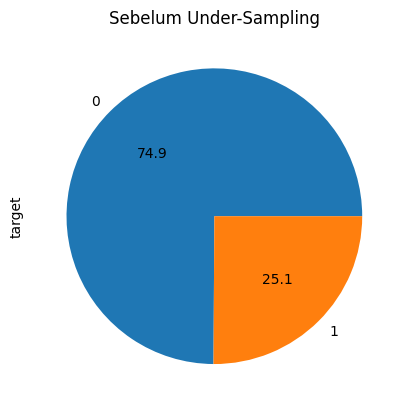

In [98]:
ax = y.value_counts().plot.pie(autopct='%.1f')
_ = ax.set_title("Sebelum Under-Sampling")

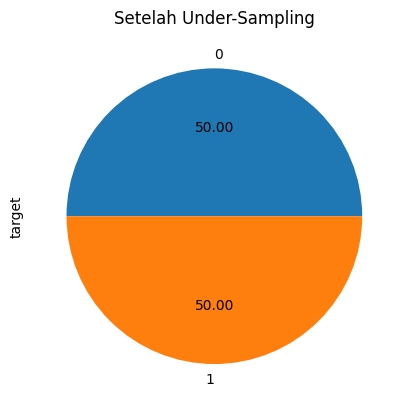

In [99]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
x_under, y_under = rus.fit_resample(x, y)

ax = y_under.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Setelah Under-Sampling")

In [100]:
y_under.value_counts()

0    4556
1    4556
Name: target, dtype: int64

 # **STAGE 3 - Machine Learning Evaluation and Supervised Learning**

In [101]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))

    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x_over.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

# **Scenario 1 (Baseline)**

In [102]:
from sklearn.model_selection import train_test_split

x_bl = df_encod_bl.drop(['target'], axis=1)
y_bl = df_encod_bl['target']
x_train, x_test, y_train, y_test = train_test_split(x_bl, y_bl, test_size=0.3, random_state=42)

## Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, max_iter = 1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
eval_classification(lr, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.58
Recall (Test Set): 0.25
F1-Score (Test Set): 0.35
AUC: 0.59


In [104]:
# cross validation
from sklearn.model_selection import cross_val_score
model = LogisticRegression(random_state=42, max_iter = 1000)

result = cross_val_score(model, x_bl, y_bl, cv=5, scoring='precision') # calculate score
result.mean()

0.5837087402425315

In [105]:
# confusion matrix
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(random_state=42, max_iter = 1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[4036,  264],
       [1086,  362]])

## k-Nearest Neighbor

In [106]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(x_train, y_train) # fit model KNN dari data train

y_pred = knn.predict(x_test)
eval_classification(knn, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.71
Precision (Test Set): 0.38
Recall (Test Set): 0.23
F1-Score (Test Set): 0.29
AUC: 0.55


In [107]:
# cross validation
from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier()

result = cross_val_score(model, x_bl, y_bl, cv=5, scoring='precision') # calculate score
result.mean()

0.3886952152171793

In [108]:
# confusion matrix
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[3756,  544],
       [1110,  338]])

## Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
eval_classification(dt, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.72
Precision (Test Set): 0.44
Recall (Test Set): 0.45
F1-Score (Test Set): 0.45
AUC: 0.63


In [110]:
# cross validation
from sklearn.model_selection import cross_val_score
model =  DecisionTreeClassifier(random_state=42)

result = cross_val_score(model, x_bl, y_bl, cv=5, scoring='precision') # calculate score
result.mean()

0.4257864019714498

In [111]:
# confusion matrix
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[3460,  840],
       [ 792,  656]])

## Bagging: Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
eval_classification(rf, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.57
Recall (Test Set): 0.43
F1-Score (Test Set): 0.49
AUC: 0.66


In [113]:
# cross validation
from sklearn.model_selection import cross_val_score
model =  RandomForestClassifier(random_state=42)

result = cross_val_score(model, x_bl, y_bl, cv=5, scoring='precision') # calculate score
result.mean()

0.5782054139202782

In [114]:
# confusion matrix
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[3831,  469],
       [ 831,  617]])

## Boosting: AdaBoost

In [115]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train, y_train)

y_pred = ab.predict(x_test)
eval_classification(ab, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.60
Recall (Test Set): 0.31
F1-Score (Test Set): 0.41
AUC: 0.62


In [116]:
# cross validation
from sklearn.model_selection import cross_val_score
model =  AdaBoostClassifier(random_state=42)

result = cross_val_score(model, x_bl, y_bl, cv=5, scoring='precision') # calculate score
result.mean()

0.6035884241966959

In [117]:
# confusion matrix
from sklearn.metrics import confusion_matrix
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train, y_train)

y_pred = ab.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[4004,  296],
       [1005,  443]])

## Boosting: XgBoost

In [118]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)
xg.fit(x_train, y_train)

y_pred = xg.predict(x_test)
eval_classification(xg, y_pred, x_train, y_train, x_test, y_test)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy (Test Set): 0.78
Precision (Test Set): 0.57
Recall (Test Set): 0.46
F1-Score (Test Set): 0.51
AUC: 0.67


In [119]:
# cross validation
from sklearn.model_selection import cross_val_score
model =  XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)

result = cross_val_score(model, x_bl, y_bl, cv=5, scoring='precision') # calculate score
result.mean()

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

0.5777997155559544

In [120]:
# confusion matrix
from sklearn.metrics import confusion_matrix
xg = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)
xg.fit(x_train, y_train)

y_pred = xg.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


array([[3802,  498],
       [ 775,  673]])

## Catboost

In [121]:
pip install catboost

In [122]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(random_state=42)
cb.fit(x_train, y_train)

y_pred = cb.predict(x_test)
eval_classification(cb, y_pred, x_train, y_train, x_test, y_test)

Learning rate set to 0.031214
0:	learn: 0.6766551	total: 55.2ms	remaining: 55.1s
1:	learn: 0.6612262	total: 60ms	remaining: 29.9s
2:	learn: 0.6471024	total: 64.4ms	remaining: 21.4s
3:	learn: 0.6338879	total: 69.3ms	remaining: 17.2s
4:	learn: 0.6233538	total: 74.3ms	remaining: 14.8s
5:	learn: 0.6124009	total: 78.8ms	remaining: 13.1s
6:	learn: 0.6029736	total: 84.2ms	remaining: 11.9s
7:	learn: 0.5926476	total: 89.5ms	remaining: 11.1s
8:	learn: 0.5834406	total: 94.7ms	remaining: 10.4s
9:	learn: 0.5744082	total: 99.8ms	remaining: 9.88s
10:	learn: 0.5669895	total: 105ms	remaining: 9.43s
11:	learn: 0.5605839	total: 110ms	remaining: 9.06s
12:	learn: 0.5533730	total: 115ms	remaining: 8.76s
13:	learn: 0.5476166	total: 120ms	remaining: 8.47s
14:	learn: 0.5424316	total: 126ms	remaining: 8.26s
15:	learn: 0.5366995	total: 131ms	remaining: 8.05s
16:	learn: 0.5311249	total: 136ms	remaining: 7.88s
17:	learn: 0.5260514	total: 141ms	remaining: 7.72s
18:	learn: 0.5210709	total: 147ms	remaining: 7.58s
19:

In [123]:
# cross validation
from sklearn.model_selection import cross_val_score
model = CatBoostClassifier(random_state=42)

result = cross_val_score(model, x_bl, y_bl, cv=5, scoring='precision') # calculate score
result.mean()

Output streaming akan dipotong hingga 5000 baris terakhir.
4:	learn: 0.6210210	total: 97ms	remaining: 19.3s
5:	learn: 0.6096731	total: 109ms	remaining: 18.1s
6:	learn: 0.5997714	total: 126ms	remaining: 17.9s
7:	learn: 0.5904187	total: 138ms	remaining: 17.1s
8:	learn: 0.5827082	total: 160ms	remaining: 17.6s
9:	learn: 0.5754601	total: 168ms	remaining: 16.7s
10:	learn: 0.5682866	total: 178ms	remaining: 16s
11:	learn: 0.5616130	total: 185ms	remaining: 15.2s
12:	learn: 0.5543736	total: 197ms	remaining: 15s
13:	learn: 0.5486487	total: 204ms	remaining: 14.3s
14:	learn: 0.5426082	total: 211ms	remaining: 13.8s
15:	learn: 0.5369945	total: 219ms	remaining: 13.5s
16:	learn: 0.5315342	total: 226ms	remaining: 13.1s
17:	learn: 0.5266671	total: 233ms	remaining: 12.7s
18:	learn: 0.5220351	total: 240ms	remaining: 12.4s
19:	learn: 0.5174659	total: 255ms	remaining: 12.5s
20:	learn: 0.5135314	total: 271ms	remaining: 12.6s
21:	learn: 0.5101645	total: 289ms	remaining: 12.8s
22:	learn: 0.5063865	total: 307ms	

0.5955700201243388

In [124]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cb = CatBoostClassifier(random_state=42)
cb.fit(x_train, y_train)

y_pred = cb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

Learning rate set to 0.031214
0:	learn: 0.6766551	total: 9.02ms	remaining: 9.01s
1:	learn: 0.6612262	total: 14.7ms	remaining: 7.35s
2:	learn: 0.6471024	total: 21ms	remaining: 6.98s
3:	learn: 0.6338879	total: 27.2ms	remaining: 6.76s
4:	learn: 0.6233538	total: 32.5ms	remaining: 6.46s
5:	learn: 0.6124009	total: 37.4ms	remaining: 6.19s
6:	learn: 0.6029736	total: 43.5ms	remaining: 6.18s
7:	learn: 0.5926476	total: 49.4ms	remaining: 6.13s
8:	learn: 0.5834406	total: 55ms	remaining: 6.06s
9:	learn: 0.5744082	total: 60.3ms	remaining: 5.97s
10:	learn: 0.5669895	total: 65.4ms	remaining: 5.88s
11:	learn: 0.5605839	total: 70.8ms	remaining: 5.83s
12:	learn: 0.5533730	total: 76.4ms	remaining: 5.8s
13:	learn: 0.5476166	total: 81.5ms	remaining: 5.74s
14:	learn: 0.5424316	total: 86.8ms	remaining: 5.7s
15:	learn: 0.5366995	total: 92.1ms	remaining: 5.66s
16:	learn: 0.5311249	total: 97.8ms	remaining: 5.66s
17:	learn: 0.5260514	total: 103ms	remaining: 5.63s
18:	learn: 0.5210709	total: 109ms	remaining: 5.61s


array([[3812,  488],
       [ 755,  693]])

# **Scenario 2**

In [125]:
from sklearn.model_selection import train_test_split

x_2 = x_over
y_2 = y_over
x_train, x_test, y_train, y_test = train_test_split(x_2, y_2, test_size=0.3, random_state=42)

In [126]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18157 entries, 0 to 19157
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   relevent_experience                   18157 non-null  int64  
 1   education_level                       18157 non-null  int8   
 2   last_new_job                          18157 non-null  int8   
 3   experience_level                      18157 non-null  int8   
 4   city_development_index_norm           18157 non-null  float64
 5   training_hours_norm                   18157 non-null  float64
 6   gender_Female                         18157 non-null  uint8  
 7   gender_Male                           18157 non-null  uint8  
 8   gender_Other                          18157 non-null  uint8  
 9   enrolled_university_Full time course  18157 non-null  uint8  
 10  enrolled_university_Part time course  18157 non-null  uint8  
 11  enrolled_univer

## Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, max_iter = 1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
eval_classification(lr, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.73
Precision (Test Set): 0.72
Recall (Test Set): 0.74
F1-Score (Test Set): 0.73
AUC: 0.73


In [128]:
# cross validation
from sklearn.model_selection import cross_val_score
model = LogisticRegression(random_state=42, max_iter = 1000)

result = cross_val_score(model, x_2, y_2, cv=5, scoring='precision') # calculate score
result.mean()

0.724034658133525

In [129]:
# confusion matrix
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(random_state=42, max_iter = 1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[2931, 1180],
       [1045, 3005]])

## k-Nearest Neighbor

In [130]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(x_train, y_train) # fit model KNN dari data train

y_pred = knn.predict(x_test)
eval_classification(knn, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.72
Precision (Test Set): 0.69
Recall (Test Set): 0.79
F1-Score (Test Set): 0.74
AUC: 0.72


In [131]:
# cross validation
from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier()

result = cross_val_score(model, x_2, y_2, cv=5, scoring='precision') # calculate score
result.mean()

0.708071555523276

In [132]:
# confusion matrix
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[2673, 1438],
       [ 831, 3219]])

## Decision Tree

In [133]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
eval_classification(dt, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.81
Recall (Test Set): 0.93
F1-Score (Test Set): 0.86
AUC: 0.85


In [134]:
# cross validation
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier(random_state=42)

result = cross_val_score(model, x_2, y_2, cv=5, scoring='precision') # calculate score
result.mean()

0.8160260779746553

In [135]:
# confusion matrix
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[3203,  908],
       [ 288, 3762]])

## Bagging: Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
eval_classification(rf, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.84
Recall (Test Set): 0.94
F1-Score (Test Set): 0.89
AUC: 0.88


In [137]:
# cross validation
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(random_state=42)

result = cross_val_score(model, x_2, y_2, cv=5, scoring='precision') # calculate score
result.mean()

0.8485103084673723

In [138]:
# confusion matrix
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[3358,  753],
       [ 233, 3817]])

## Boosting: AdaBoost

In [139]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train, y_train)

y_pred = ab.predict(x_test)
eval_classification(ab, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.77
Recall (Test Set): 0.75
F1-Score (Test Set): 0.76
AUC: 0.76


In [140]:
# cross validation
from sklearn.model_selection import cross_val_score
model = AdaBoostClassifier(random_state=42)

result = cross_val_score(model, x_2, y_2, cv=5, scoring='precision') # calculate score
result.mean()

0.7636358380883583

In [141]:
# confusion matrix
from sklearn.metrics import confusion_matrix
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train, y_train)

y_pred = ab.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[3174,  937],
       [ 995, 3055]])

## Boosting: XgBoost

In [142]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)
xg.fit(x_train, y_train)

y_pred = xg.predict(x_test)
eval_classification(xg, y_pred, x_train, y_train, x_test, y_test)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy (Test Set): 0.82
Precision (Test Set): 0.80
Recall (Test Set): 0.84
F1-Score (Test Set): 0.82
AUC: 0.82


In [143]:
# cross validation
from sklearn.model_selection import cross_val_score
model = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)

result = cross_val_score(model, x_2, y_2, cv=5, scoring='precision') # calculate score
result.mean()

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

0.8023525926940211

In [144]:
# confusion matrix
from sklearn.metrics import confusion_matrix
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train, y_train)

y_pred = xg.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[3246,  865],
       [ 634, 3416]])

## Catboost

In [145]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(random_state=42)
cb.fit(x_train, y_train)

y_pred = cb.predict(x_test)
eval_classification(cb, y_pred, x_train, y_train, x_test, y_test)

Learning rate set to 0.036254
0:	learn: 0.6828810	total: 19.4ms	remaining: 19.4s
1:	learn: 0.6734659	total: 37.1ms	remaining: 18.5s
2:	learn: 0.6645872	total: 51.7ms	remaining: 17.2s
3:	learn: 0.6561235	total: 61.8ms	remaining: 15.4s
4:	learn: 0.6488735	total: 70.2ms	remaining: 14s
5:	learn: 0.6415465	total: 78.7ms	remaining: 13s
6:	learn: 0.6346400	total: 87ms	remaining: 12.3s
7:	learn: 0.6282112	total: 95.5ms	remaining: 11.8s
8:	learn: 0.6230442	total: 102ms	remaining: 11.2s
9:	learn: 0.6180090	total: 111ms	remaining: 11s
10:	learn: 0.6126132	total: 120ms	remaining: 10.7s
11:	learn: 0.6078469	total: 129ms	remaining: 10.6s
12:	learn: 0.6029088	total: 146ms	remaining: 11.1s
13:	learn: 0.5988147	total: 165ms	remaining: 11.6s
14:	learn: 0.5948300	total: 184ms	remaining: 12.1s
15:	learn: 0.5913283	total: 201ms	remaining: 12.4s
16:	learn: 0.5882961	total: 219ms	remaining: 12.6s
17:	learn: 0.5858039	total: 232ms	remaining: 12.7s
18:	learn: 0.5827438	total: 252ms	remaining: 13s
19:	learn: 0.

In [146]:
# cross validation
from sklearn.model_selection import cross_val_score
model = CatBoostClassifier(random_state=42)

result = cross_val_score(model, x_2, y_2, cv=5, scoring='precision') # calculate score
result.mean()

Output streaming akan dipotong hingga 5000 baris terakhir.
4:	learn: 0.6467228	total: 37.4ms	remaining: 7.44s
5:	learn: 0.6393551	total: 51.6ms	remaining: 8.55s
6:	learn: 0.6326573	total: 60.2ms	remaining: 8.54s
7:	learn: 0.6258537	total: 67.6ms	remaining: 8.38s
8:	learn: 0.6200720	total: 74.7ms	remaining: 8.22s
9:	learn: 0.6149456	total: 81.7ms	remaining: 8.09s
10:	learn: 0.6097541	total: 89.3ms	remaining: 8.03s
11:	learn: 0.6054990	total: 96.5ms	remaining: 7.94s
12:	learn: 0.6010982	total: 104ms	remaining: 7.87s
13:	learn: 0.5971805	total: 113ms	remaining: 7.99s
14:	learn: 0.5933996	total: 120ms	remaining: 7.86s
15:	learn: 0.5894440	total: 131ms	remaining: 8.07s
16:	learn: 0.5859942	total: 138ms	remaining: 8s
17:	learn: 0.5832172	total: 145ms	remaining: 7.93s
18:	learn: 0.5803406	total: 153ms	remaining: 7.88s
19:	learn: 0.5775465	total: 160ms	remaining: 7.85s
20:	learn: 0.5750752	total: 167ms	remaining: 7.8s
21:	learn: 0.5726027	total: 174ms	remaining: 7.75s
22:	learn: 0.5701548	tota

0.796099907292239

In [147]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cb = CatBoostClassifier(random_state=42)
cb.fit(x_train, y_train)

y_pred = cb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

Learning rate set to 0.036254
0:	learn: 0.6828810	total: 6.6ms	remaining: 6.6s
1:	learn: 0.6734659	total: 13ms	remaining: 6.49s
2:	learn: 0.6645872	total: 19.7ms	remaining: 6.54s
3:	learn: 0.6561235	total: 26.4ms	remaining: 6.59s
4:	learn: 0.6488735	total: 32.2ms	remaining: 6.4s
5:	learn: 0.6415465	total: 39.2ms	remaining: 6.49s
6:	learn: 0.6346400	total: 47.5ms	remaining: 6.74s
7:	learn: 0.6282112	total: 56.2ms	remaining: 6.97s
8:	learn: 0.6230442	total: 61ms	remaining: 6.71s
9:	learn: 0.6180090	total: 67.5ms	remaining: 6.69s
10:	learn: 0.6126132	total: 75.5ms	remaining: 6.79s
11:	learn: 0.6078469	total: 82ms	remaining: 6.75s
12:	learn: 0.6029088	total: 88.9ms	remaining: 6.75s
13:	learn: 0.5988147	total: 95.7ms	remaining: 6.74s
14:	learn: 0.5948300	total: 103ms	remaining: 6.73s
15:	learn: 0.5913283	total: 109ms	remaining: 6.72s
16:	learn: 0.5882961	total: 116ms	remaining: 6.71s
17:	learn: 0.5858039	total: 121ms	remaining: 6.6s
18:	learn: 0.5827438	total: 128ms	remaining: 6.6s
19:	lear

array([[3248,  863],
       [ 748, 3302]])

# **Scenario 3**

In [148]:
from sklearn.model_selection import train_test_split

x_3 = x_under
y_3 = y_under
x_train, x_test, y_train, y_test = train_test_split(x_3, y_3, test_size=0.3, random_state=42)

In [149]:
x_under.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9112 entries, 0 to 9111
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   relevent_experience                   9112 non-null   int64  
 1   education_level                       9112 non-null   int8   
 2   last_new_job                          9112 non-null   int8   
 3   experience_level                      9112 non-null   int8   
 4   city_development_index_norm           9112 non-null   float64
 5   training_hours_norm                   9112 non-null   float64
 6   gender_Female                         9112 non-null   uint8  
 7   gender_Male                           9112 non-null   uint8  
 8   gender_Other                          9112 non-null   uint8  
 9   enrolled_university_Full time course  9112 non-null   uint8  
 10  enrolled_university_Part time course  9112 non-null   uint8  
 11  enrolled_universi

## Logistic Regression

In [150]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, max_iter = 1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
eval_classification(lr, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.73
Recall (Test Set): 0.74
F1-Score (Test Set): 0.74
AUC: 0.74


In [151]:
# cross validation
from sklearn.model_selection import cross_val_score
model = LogisticRegression(random_state=42, max_iter = 1000)

result = cross_val_score(model, x_3, y_3, cv=5, scoring='precision') # calculate score
result.mean()

0.73037336034666

In [152]:
# confusion matrix
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(random_state=42, max_iter = 1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[1019,  363],
       [ 348, 1004]])

## k-Nearest Neighbor

In [153]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(x_train, y_train) # fit model KNN dari data train

y_pred = knn.predict(x_test)
eval_classification(knn, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.66
Precision (Test Set): 0.66
Recall (Test Set): 0.67
F1-Score (Test Set): 0.66
AUC: 0.67


In [154]:
# cross validation
from sklearn.model_selection import cross_val_score
model =  KNeighborsClassifier()

result = cross_val_score(model, x_3, y_3, cv=5, scoring='precision') # calculate score
result.mean()

0.6669882804819276

In [155]:
# confusion matrix
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[912, 470],
       [446, 906]])

## Decision Tree

In [156]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
eval_classification(dt, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.64
Recall (Test Set): 0.66
F1-Score (Test Set): 0.65
AUC: 0.65


In [157]:
# cross validation
from sklearn.model_selection import cross_val_score
model =  DecisionTreeClassifier(random_state=42)

result = cross_val_score(model, x_3, y_3, cv=5, scoring='precision') # calculate score
result.mean()

0.6368044957176788

In [158]:
# confusion matrix
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[883, 499],
       [457, 895]])

## Bagging: Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
eval_classification(rf, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.73
Precision (Test Set): 0.74
Recall (Test Set): 0.69
F1-Score (Test Set): 0.72
AUC: 0.73


In [160]:
# cross validation
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(random_state=42)

result = cross_val_score(model, x_3, y_3, cv=5, scoring='precision') # calculate score
result.mean()

0.7443191543268508

In [161]:
# confusion matrix
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[1049,  333],
       [ 413,  939]])

## Boosting: AdaBoost

In [162]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train, y_train)

y_pred = ab.predict(x_test)
eval_classification(ab, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.76
Recall (Test Set): 0.75
F1-Score (Test Set): 0.76
AUC: 0.76


In [163]:
# cross validation
from sklearn.model_selection import cross_val_score
model = AdaBoostClassifier(random_state=42)

result = cross_val_score(model, x_3, y_3, cv=5, scoring='precision') # calculate score
result.mean()

0.7667593017783703

In [164]:
# confusion matrix
from sklearn.metrics import confusion_matrix
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train, y_train)

y_pred = ab.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[1068,  314],
       [ 339, 1013]])

## Boosting: XgBoost

In [165]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)
xg.fit(x_train, y_train)

y_pred = xg.predict(x_test)
eval_classification(xg, y_pred, x_train, y_train, x_test, y_test)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy (Test Set): 0.76
Precision (Test Set): 0.76
Recall (Test Set): 0.75
F1-Score (Test Set): 0.76
AUC: 0.76


In [166]:
# cross validation
from sklearn.model_selection import cross_val_score
model = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)

result = cross_val_score(model, x_3, y_3, cv=5, scoring='precision') # calculate score
result.mean()

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

0.7497788594818907

In [167]:
# confusion matrix
from sklearn.metrics import confusion_matrix
xg = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)
xg.fit(x_train, y_train)

y_pred = xg.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


array([[1069,  313],
       [ 339, 1013]])

## Catboost

In [168]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(random_state=42)
cb.fit(x_train, y_train)

y_pred = cb.predict(x_test)
eval_classification(cb, y_pred, x_train, y_train, x_test, y_test)

Learning rate set to 0.022727
0:	learn: 0.6867937	total: 3.19ms	remaining: 3.19s
1:	learn: 0.6808357	total: 6.45ms	remaining: 3.22s
2:	learn: 0.6751631	total: 9.59ms	remaining: 3.19s
3:	learn: 0.6688696	total: 12.7ms	remaining: 3.17s
4:	learn: 0.6638332	total: 15.7ms	remaining: 3.13s
5:	learn: 0.6583255	total: 20.2ms	remaining: 3.35s
6:	learn: 0.6533570	total: 23.3ms	remaining: 3.3s
7:	learn: 0.6482008	total: 26.3ms	remaining: 3.25s
8:	learn: 0.6435512	total: 29.6ms	remaining: 3.26s
9:	learn: 0.6393733	total: 32.7ms	remaining: 3.24s
10:	learn: 0.6351636	total: 35.8ms	remaining: 3.21s
11:	learn: 0.6316954	total: 38.4ms	remaining: 3.17s
12:	learn: 0.6278883	total: 42.1ms	remaining: 3.19s
13:	learn: 0.6241710	total: 44.9ms	remaining: 3.16s
14:	learn: 0.6207761	total: 48ms	remaining: 3.15s
15:	learn: 0.6178121	total: 51ms	remaining: 3.14s
16:	learn: 0.6145929	total: 53.8ms	remaining: 3.11s
17:	learn: 0.6120605	total: 56.8ms	remaining: 3.1s
18:	learn: 0.6089403	total: 60ms	remaining: 3.1s
1

In [169]:
# cross validation
from sklearn.model_selection import cross_val_score
model = CatBoostClassifier(random_state=42)

result = cross_val_score(model, x_3, y_3, cv=5, scoring='precision') # calculate score
result.mean()

Output streaming akan dipotong hingga 5000 baris terakhir.
4:	learn: 0.6617137	total: 21ms	remaining: 4.17s
5:	learn: 0.6564951	total: 24.2ms	remaining: 4.01s
6:	learn: 0.6512967	total: 27.7ms	remaining: 3.92s
7:	learn: 0.6462251	total: 31.1ms	remaining: 3.85s
8:	learn: 0.6410794	total: 34.4ms	remaining: 3.79s
9:	learn: 0.6366297	total: 37.7ms	remaining: 3.73s
10:	learn: 0.6318964	total: 41.1ms	remaining: 3.69s
11:	learn: 0.6277486	total: 44.3ms	remaining: 3.65s
12:	learn: 0.6240372	total: 47.6ms	remaining: 3.62s
13:	learn: 0.6205219	total: 51ms	remaining: 3.59s
14:	learn: 0.6170176	total: 54.3ms	remaining: 3.57s
15:	learn: 0.6133697	total: 57.6ms	remaining: 3.54s
16:	learn: 0.6106753	total: 59.9ms	remaining: 3.46s
17:	learn: 0.6072933	total: 63.4ms	remaining: 3.46s
18:	learn: 0.6041738	total: 66.8ms	remaining: 3.45s
19:	learn: 0.6009958	total: 70.7ms	remaining: 3.46s
20:	learn: 0.5983411	total: 74ms	remaining: 3.45s
21:	learn: 0.5956108	total: 77.5ms	remaining: 3.44s
22:	learn: 0.5930

0.7730374803804569

In [170]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cb = CatBoostClassifier(random_state=42)
cb.fit(x_train, y_train)

y_pred = cb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

Learning rate set to 0.022727
0:	learn: 0.6867937	total: 3.08ms	remaining: 3.08s
1:	learn: 0.6808357	total: 6.2ms	remaining: 3.09s
2:	learn: 0.6751631	total: 9.43ms	remaining: 3.13s
3:	learn: 0.6688696	total: 12.4ms	remaining: 3.1s
4:	learn: 0.6638332	total: 15.7ms	remaining: 3.12s
5:	learn: 0.6583255	total: 18.8ms	remaining: 3.11s
6:	learn: 0.6533570	total: 21.8ms	remaining: 3.1s
7:	learn: 0.6482008	total: 25.1ms	remaining: 3.11s
8:	learn: 0.6435512	total: 28.1ms	remaining: 3.09s
9:	learn: 0.6393733	total: 31.1ms	remaining: 3.08s
10:	learn: 0.6351636	total: 34.2ms	remaining: 3.08s
11:	learn: 0.6316954	total: 36.8ms	remaining: 3.02s
12:	learn: 0.6278883	total: 42.4ms	remaining: 3.22s
13:	learn: 0.6241710	total: 45.3ms	remaining: 3.19s
14:	learn: 0.6207761	total: 48.5ms	remaining: 3.18s
15:	learn: 0.6178121	total: 55.4ms	remaining: 3.41s
16:	learn: 0.6145929	total: 58.3ms	remaining: 3.37s
17:	learn: 0.6120605	total: 61.2ms	remaining: 3.34s
18:	learn: 0.6089403	total: 64.4ms	remaining: 3

array([[1082,  300],
       [ 331, 1021]])

# **Hyperparameter Turning**

## Bagging : Random Forest
performa model diukur menggunakan metrik **Precision** karena fokus masalahnya meningkatkan keuntungan yang diperoleh dari program penempatan kerja dan memastikan biaya yang digunakan dalam pelatihan gratis dapat memberi keuntungan yang lebih besar.

In [171]:
from sklearn.model_selection import train_test_split

x_2 = x_over
y_2 = y_over
X_train, X_test, y_train, y_test = train_test_split(x_2, y_2, test_size=0.3, random_state=42)

In [172]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# List of hyperparameters
hyperparameters = {'n_estimators': randint(50, 500),
                   'max_features': ['sqrt', 'log2', None],
                   'max_depth': [3, 5, 10, 20, None],
                   'min_samples_split': randint(2, 20),
                   'min_samples_leaf': randint(1, 20),
                   'bootstrap': [True, False],
                   'criterion' : ['gini', 'entropy']
                  }
# Init model
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, random_state=42, cv=5, scoring='precision')
rf_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = rf_tuned.predict(X_test)#Check performa dari model
eval_classification(rf_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.81
Recall (Test Set): 0.86
F1-Score (Test Set): 0.83
AUC: 0.83


In [173]:
#from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#from sklearn.ensemble import RandomForestClassifier
#import numpy as np
#from scipy.stats import randint

# List of hyperparameter
#hyperparameters  = {'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)],
                    #'max_features': ['log2', 'sqrt'],
                    #'max_depth': [2, 4],
                    #'min_samples_split': [2, 5],
                    #'min_samples_leaf': [1, 2],
                    #'bootstrap': [True, False]
                    #'criterion': ['gini', 'entropy']
                  #}

# Init model
#rf = RandomForestClassifier()
#rf_tuned = GridSearchCV(rf, hyperparameters, cv=5, verbose = 2, n_jobs = 4, scoring='precision')
#rf_tuned.fit(x_train,y_train)

# Predict & Evaluation
#y_pred = rf_tuned.predict(x_test)#Check performa dari model
#eval_classification(rf_tuned, y_pred, x_train, y_train, x_test, y_test)





### n-Estimators

param value: 1; train f1_score: 0.9273851499821145; test f1_score: 0.8180660104226983
param value: 3; train f1_score: 0.9664977768586495; test f1_score: 0.8517233402729586
param value: 5; train f1_score: 0.9792595665249404; test f1_score: 0.8631895455071122
param value: 7; train f1_score: 0.9858174450620812; test f1_score: 0.8683875448547286
param value: 9; train f1_score: 0.9879893932303853; test f1_score: 0.8706208810267082
param value: 11; train f1_score: 0.989689647990002; test f1_score: 0.8766678268940712
param value: 13; train f1_score: 0.9918741535576623; test f1_score: 0.8771889133712165
param value: 15; train f1_score: 0.9926961602671118; test f1_score: 0.8787174721189592
param value: 17; train f1_score: 0.994261268781302; test f1_score: 0.878212549201204
param value: 19; train f1_score: 0.9944145743070418; test f1_score: 0.8807701229413128
param value: 21; train f1_score: 0.9949879920643208; test f1_score: 0.883207437536316
param value: 23; train f1_score: 0.9949355192398058;

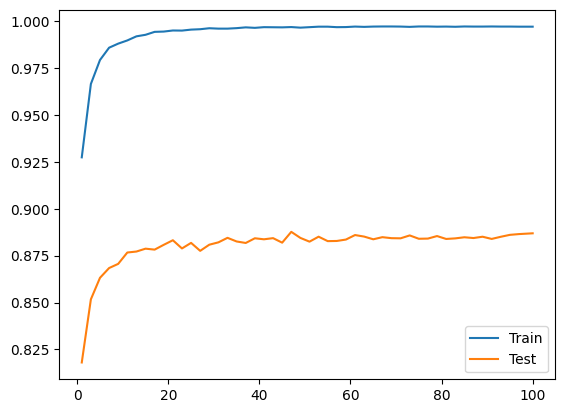

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import numpy as np




param_values = np.linspace(1, 100, 50).astype(int)
train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=c)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train = model.predict(X_train)
    train_f1_score = f1_score(y_train, y_pred_train)
    train_scores.append(train_f1_score)

    # eval on test
    y_pred = model.predict(X_test)
    test_f1_score = f1_score(y_test, y_pred)
    test_scores.append(test_f1_score)

    print('param value: ' + str(c) + '; train f1_score: ' + str(train_f1_score) + '; test f1_score: ' + str(test_f1_score))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

# Feature Importance

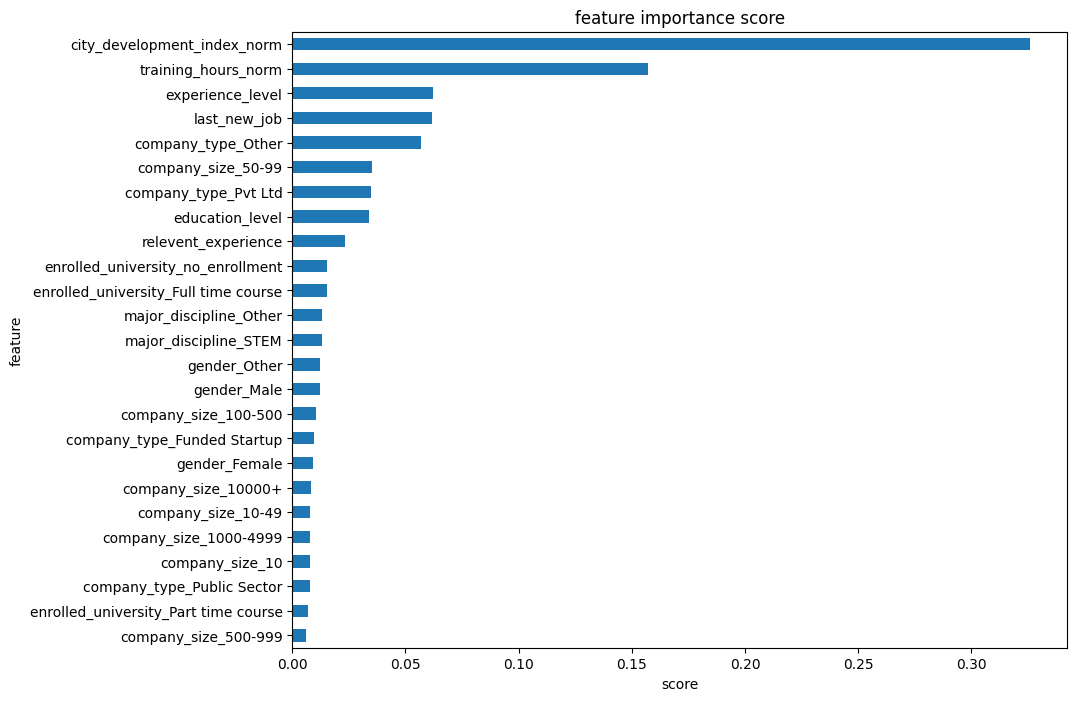

In [175]:
# Get the best parameters and best estimator from the grid search
best_params = rf_tuned.best_params_
best_rf_model = rf_tuned.best_estimator_
show_feature_importance(best_rf_model)

In [176]:
!pip install shap

In [177]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       min_samples_split=13, n_estimators=363, random_state=42)

In [178]:
#import shap
# Create an explainer for the best model
#explainer = shap.TreeExplainer(best_rf_model, feature_dependence="independent", model_output="probability")

# Calculate SHAP values for the test data
#shap_values = explainer(X_test)
#shap.summary_plot(shap_values, X_test)

# Insight
- **City_development_index** sangat berpengaruh besar terhadap kandidat yang ingin mencari perubahan pekerjaan, kandidat yang berasal dari kota-kota dengan index kotanya rendah (kota kecil) mungkin lebih ingin mencari perubahan pekerjaan.
- jumlah **training_hours** juga sangat berpengaruh dalam penentuan penempatan kerja kandidat, semakin lama waktu yang dibutuhkan kandidat untuk menyelesaikan training maka bisa terjadi kandidat sulit untuk memahami materi training atau sedang bermalas-malasan.
- Kandidat dengan tingkat pengalaman (**experience_level**) yang tinggi mungkin memiliki stabilitas pekerjaan yang lebih baik dan kemampuan yang lebih teruji dan semakin besar pula kesempatan untuk dilakukan penempatan kerja.
- **last_new_job** Informasi tentang berapa lama pelamar telah bekerja di pekerjaan sebelumnya (dalam tahun) dapat memberikan gambaran tentang stabilitas pekerjaan mereka. Pelamar yang sering berpindah pekerjaan dalam waktu singkat mungkin memiliki risiko kredit yang lebih tinggi karena mungkin menunjukkan kurangnya keterampilan atau ketidakstabilan dalam karir mereka.
- **Company_type** tempat kandidat bekerja sebelumnya dapat mengungkap karakteristik lingkungan kerja dan kondisi keuangan sebelumnya sehingga kandidat ingin mencari perubahan pekerjaan, mungkin saja kandidat tidak sesuai dengan Company_type sebelumnya sehingga berusaha mencari perubahan pekerjaan melalui pelatihan data science gratis.